In [1]:
import pandas as pd
import webbrowser
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.utils import resample
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import optuna
from time import time
from pandas.plotting import scatter_matrix
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score
)

In [2]:
df = pd.read_csv("data//heart_attack_prediction_dataset-kaggle.csv")

# Exploring the data

In [154]:
data_table = pd.read_csv("data//heart_attack_prediction_dataset-kaggle.csv")
html = data_table[0:100].to_html()

filename = "data.html"

with open(filename, "w") as f:
    f.write(html)
    
full_filename = os.path.abspath(filename)
webbrowser.open("file://{}".format(full_filename))

True

In [4]:
print(df.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [5]:
df.shape

(8765, 26)

In [6]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                     float64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                float64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                             float64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [7]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0.0,1,0,...,6.615001,261404.0,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1.0,1,1,...,4.963459,285768.0,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,F,324,174/99,72,1,0.0,0,0,...,9.463426,235282.0,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1.0,1,0,...,7.648981,125640.0,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1.0,1,1,...,1.514821,160555.0,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [8]:
df.tail()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8760,XKA5925,47,Male,250,161/75,105,0,1.0,1,1,...,2.375214,36998.0,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0.0,1,0,...,0.029104,209943.0,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1.0,0,0,...,9.005234,247338.0,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1
8763,0,25,Yes,356,138/67,75,1,1.0,0,0,...,9.005234,247338.0,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1
8764,0,25,NaN,356,138/67,75,1,NaN,0,0,...,NaN,247338.0,NaN,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


In [9]:
df.sort_values(by="Cholesterol", ascending=False).head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
7466,MCF6348,88,Male,400,170/95,93,0,1.0,1,0,...,10.854863,103694.0,29.826752,446,4,10,Vietnam,Asia,Northern Hemisphere,0
2365,KDZ8705,59,Female,400,175/84,81,1,1.0,1,0,...,9.155260,224163.0,33.139828,363,3,6,Italy,Europe,Southern Hemisphere,1
4017,AFV6141,83,Female,400,164/103,54,0,0.0,1,1,...,10.175620,207328.0,24.274822,654,2,6,Thailand,Asia,Northern Hemisphere,0
3082,EZN4283,64,Male,400,169/60,94,0,0.0,1,0,...,9.891044,286972.0,27.252316,431,1,7,Australia,Australia,Southern Hemisphere,0
5527,KIQ3505,75,Female,400,142/97,108,0,1.0,1,0,...,11.954876,240579.0,18.669631,101,4,9,Japan,Asia,Northern Hemisphere,0


In [10]:
df.sort_values(by="Cholesterol", ascending=True).head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
7277,MPC5475,68,Female,120,123/89,76,0,0.0,1,0,...,6.679078,104011.0,33.438138,547,2,4,Italy,Europe,Southern Hemisphere,1
3276,DPU9968,86,Male,120,90/87,42,1,1.0,1,0,...,8.145853,109488.0,18.463381,46,6,10,New Zealand,Australia,Southern Hemisphere,0
264,WXM0274,81,Male,120,98/108,78,0,0.0,1,0,...,8.737738,81743.0,31.878575,455,2,8,Nigeria,Africa,Northern Hemisphere,0
6555,YBE3855,57,Female,120,180/75,43,0,1.0,1,1,...,2.363777,128845.0,29.187402,139,0,8,Germany,Europe,Northern Hemisphere,1
785,XWE7501,18,Female,120,162/102,99,0,1.0,0,1,...,7.400342,32612.0,34.490889,184,2,5,China,Asia,Northern Hemisphere,0


In [11]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8765.000000,8765.000000,8765.000000,8765.000000,8764.00000,8765.000000,8765.000000,8764.000000,8765.000000,8765.000000,8765.000000,8765.000000,8764.000000,8763.000000,8764.000000,8765.000000,8765.000000,8765.000000,8765.000000
mean,53.701426,259.899144,75.021677,0.652367,0.49304,0.896634,0.501312,0.598129,10.016124,0.495722,0.498232,5.470280,5.994034,158275.912359,28.891905,417.622818,3.490473,7.022818,0.358357
std,21.251508,80.867084,20.548603,0.476246,0.49998,0.304453,0.500027,0.490304,5.784369,0.500010,0.500025,2.859551,3.466311,80583.707481,6.318967,223.751408,2.283043,1.988770,0.479545
min,18.000000,120.000000,40.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.00000,1.000000,0.000000,0.000000,4.983194,0.000000,0.000000,3.000000,2.998799,88310.000000,23.423690,225.000000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.00000,1.000000,1.000000,1.000000,10.072236,0.000000,0.000000,5.000000,5.933968,157866.000000,28.769328,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.00000,1.000000,1.000000,1.000000,15.054078,1.000000,1.000000,8.000000,9.019029,227841.500000,34.323504,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [12]:
df.describe(include = 'object')

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
count,8765,8761,8765,8764,8765,8765,8765
unique,8764,5,3915,3,20,6,2
top,0,Male,101/93,Healthy,Germany,Asia,Northern Hemisphere
freq,2,6106,8,2961,477,2543,5662


In [13]:
df["Age"].mean()

53.701426126640044

In [14]:
df["Age"].mode()

0    90
Name: Age, dtype: int64

In [15]:
df['Age'].unique()

array([67, 21, 84, 66, 54, 90, 20, 43, 73, 71, 77, 60, 88, 69, 38, 50, 45,
       36, 48, 40, 79, 63, 27, 25, 86, 42, 52, 29, 30, 47, 44, 33, 51, 70,
       85, 31, 56, 24, 74, 72, 55, 26, 53, 46, 57, 22, 35, 39, 80, 65, 83,
       82, 28, 19, 75, 18, 34, 37, 89, 32, 49, 23, 59, 62, 64, 61, 76, 41,
       87, 81, 58, 78, 68], dtype=int64)

In [16]:
df["Sex"].mode()

0    Male
Name: Sex, dtype: object

In [17]:
df['Sex'].unique()

array(['Male', 'F', 'Female', 'M', nan, 'Yes'], dtype=object)

In [18]:
df["Sex"].value_counts()

Sex
Male      6106
Female    2650
F            2
M            2
Yes          1
Name: count, dtype: int64

In [19]:
df["Cholesterol"].mean()

259.899144324016

In [20]:
df["Exercise Hours Per Week"].mean()

10.016124491312038

In [23]:
df['Heart Rate'].unique()

array([ 72,  98,  73,  93,  48,  84, 107,  68,  55,  97,  70,  85, 102,
        40,  56, 104,  71,  69,  66,  81,  52, 105,  96,  74,  49,  45,
        50,  46,  44, 106,  83,  86,  65, 101,  51,  43,  79,  90,  94,
        78,  92,  54, 109,  61,  64,  82, 110,  42,  63,  41, 100,  76,
        75,  58,  53,  60,  77,  47,  59,  57,  87,  67,  88,  99,  80,
        95, 108,  89,  62, 103,  91], dtype=int64)

In [21]:
df["Heart Rate"].mean()

75.0216771249287

In [22]:
df["Diabetes"].mode()

0    1
Name: Diabetes, dtype: int64

In [24]:
df["Sedentary Hours Per Day"].mean()

5.994033771715312

In [25]:
df["BMI"].mean()

28.89190488058421

In [26]:
df["Sleep Hours Per Day"].mean()

7.0228180262407305

In [27]:
df["Stress Level"].mean()

5.470279520821449

In [28]:
df["Stress Level"].mode()

0    2
Name: Stress Level, dtype: int64

In [29]:
df["Physical Activity Days Per Week"].mean()

3.4904734740444954

In [30]:
df['Cholesterol'].unique()

array([208, 389, 324, 383, 318, 297, 358, 220, 145, 248, 373, 374, 228,
       259, 122, 379, 166, 303, 340, 294, 359, 202, 133, 159, 271, 273,
       328, 154, 135, 197, 321, 375, 360, 263, 201, 347, 129, 229, 251,
       121, 190, 185, 279, 336, 192, 180, 203, 368, 222, 243, 218, 120,
       285, 377, 369, 311, 139, 266, 153, 339, 329, 333, 398, 124, 183,
       163, 362, 390, 200, 396, 255, 209, 247, 250, 227, 246, 223, 330,
       195, 194, 178, 155, 240, 237, 216, 276, 224, 326, 198, 301, 314,
       304, 334, 213, 254, 230, 316, 277, 388, 206, 384, 205, 261, 308,
       338, 382, 291, 168, 171, 378, 253, 245, 226, 281, 123, 173, 231,
       234, 268, 306, 186, 293, 161, 380, 239, 149, 320, 219, 335, 265,
       126, 307, 270, 225, 193, 148, 296, 136, 364, 353, 252, 232, 387,
       299, 357, 214, 370, 345, 351, 344, 152, 150, 131, 272, 302, 337,
       170, 356, 274, 188, 125, 138, 376, 181, 184, 275, 394, 128, 217,
       399, 283, 289, 284, 327, 262, 212, 350, 385, 162, 141, 36

In [31]:
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [32]:
df['Diabetes'].value_counts()

Diabetes
1    5718
0    3047
Name: count, dtype: int64

In [33]:
df['Family History'].value_counts()

Family History
0.0    4443
1.0    4321
Name: count, dtype: int64

In [34]:
df['Smoking'].value_counts()

Smoking
1    7859
0     906
Name: count, dtype: int64

In [35]:
df['Obesity'].value_counts()

Obesity
1    4394
0    4371
Name: count, dtype: int64

In [36]:
df['Diet'].value_counts()

Diet
Healthy      2961
Average      2912
Unhealthy    2891
Name: count, dtype: int64

In [37]:
df['Stress Level'].value_counts()

Stress Level
2     913
4     910
7     903
9     887
8     881
3     868
1     865
5     860
6     855
10    823
Name: count, dtype: int64

In [38]:
df['Physical Activity Days Per Week'].value_counts()

Physical Activity Days Per Week
3    1143
1    1121
2    1109
7    1097
5    1079
4    1077
6    1074
0    1065
Name: count, dtype: int64

In [39]:
df['Sleep Hours Per Day'].value_counts()

Sleep Hours Per Day
10    1293
8     1288
6     1276
7     1270
5     1263
9     1192
4     1183
Name: count, dtype: int64

In [40]:
df['Country'].value_counts()

Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    459
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64

In [41]:
df['Country'].mode()

0    Germany
Name: Country, dtype: object

In [42]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3141
Name: count, dtype: int64

In [43]:
df.duplicated().sum()

0

# Data cleaning

In [44]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                4
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     1
Smoking                            0
Obesity                            0
Alcohol Consumption                1
Exercise Hours Per Week            0
Diet                               1
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            1
Income                             2
BMI                                1
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [45]:
print(f"Sum of rows with missing values: {df.isnull().any(axis=1).sum()}")

Sum of rows with missing values: 6


In [46]:
x = df['Sex'].mode()[0]
df['Sex'].fillna(x, inplace=True)

C:\Users\RAGATP\AppData\Local\Temp\ipykernel_39284\4006651192.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].fillna(x, inplace=True)


In [47]:
df['Sex'] = df['Sex'].replace({
    'F': 'Female',
    'female': 'Female',
    'M': 'Male',
    'male': 'Male',
})

In [48]:
x = df['Income'].mean()
df['Income'].fillna(x, inplace=True)

C:\Users\RAGATP\AppData\Local\Temp\ipykernel_39284\2828893509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(x, inplace=True)


In [49]:
df = df.dropna() 

In [50]:
valid_genders = ["Male", "Female"]
invalid_rows = df[~df["Sex"].isin(valid_genders)].index
df.drop(index=invalid_rows, inplace=True)

In [51]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

# Visualisations

## Histograms

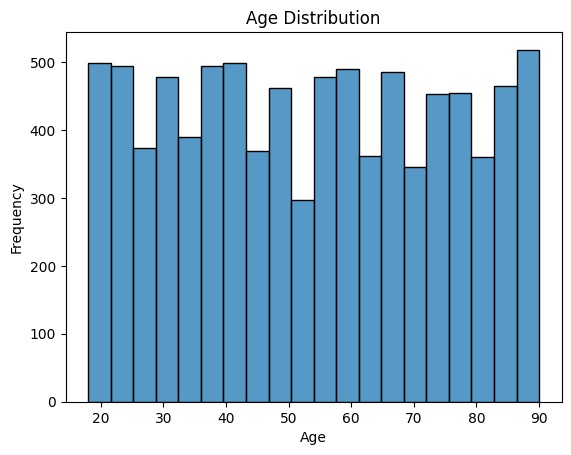

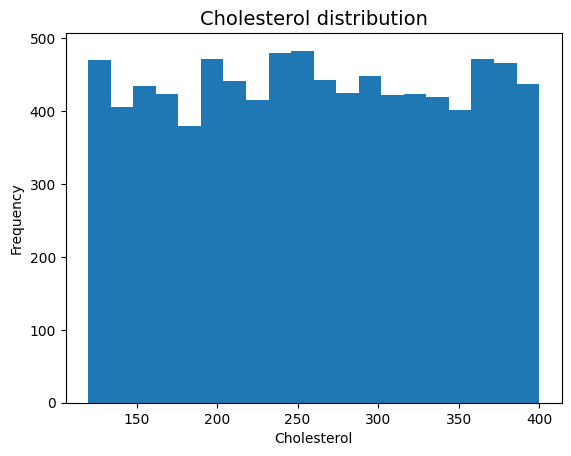

In [52]:
sns.histplot(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

df['Cholesterol'].plot(kind='hist', bins = 20)
plt.title('Cholesterol distribution', fontsize=14)

plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

plt.show()

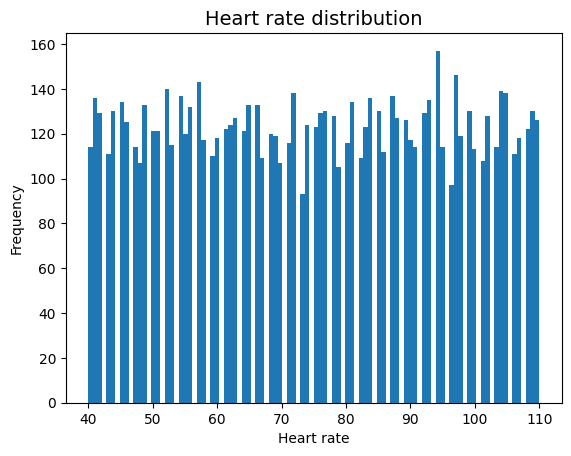

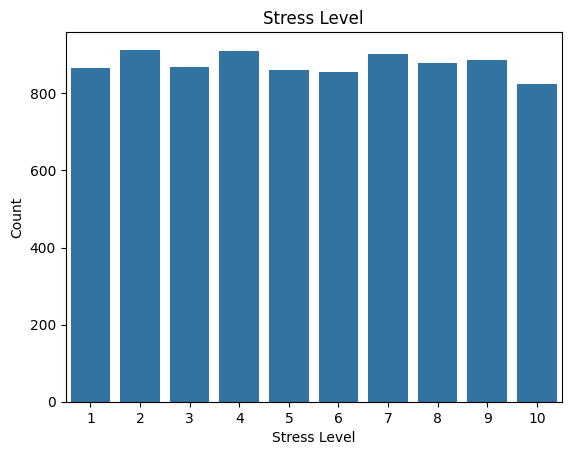

In [53]:
df['Heart Rate'].plot(kind='hist', bins =100)
plt.title('Heart rate distribution', fontsize=14)
plt.xlabel('Heart rate')
plt.ylabel('Frequency')
plt.show()


sns.countplot(data=df, x='Stress Level')
plt.title('Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ], ['1','2','3','4','5','6','7','8','9','10'])  
plt.show()

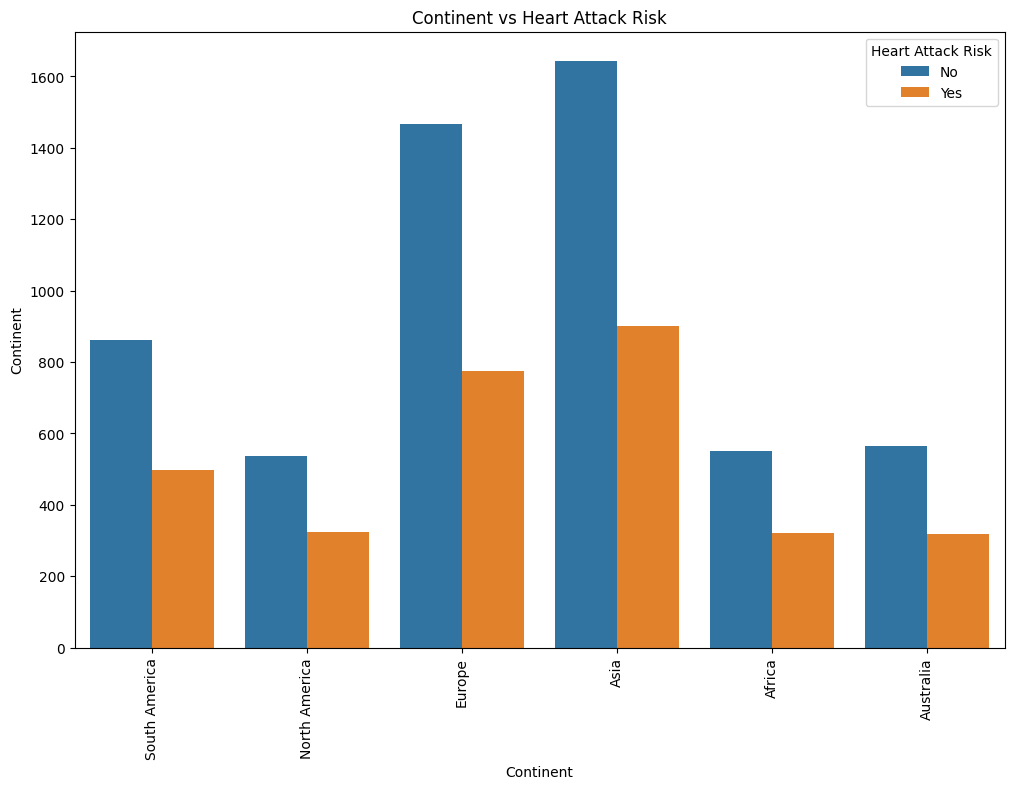

In [54]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Continent', hue='Heart Attack Risk')
plt.title('Continent vs Heart Attack Risk')
plt.xlabel('Continent')
plt.ylabel('Continent')
plt.xticks(rotation=90) 
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

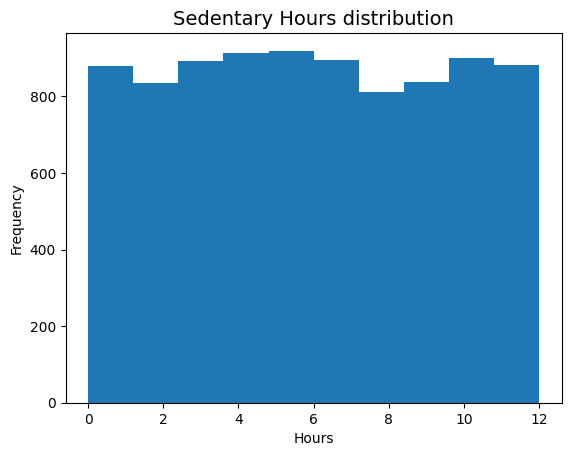

In [55]:
df['Sedentary Hours Per Day'].plot(kind='hist')
plt.title('Sedentary Hours distribution', fontsize=14)

plt.xlabel('Hours')
plt.ylabel('Frequency')
    
plt.show()

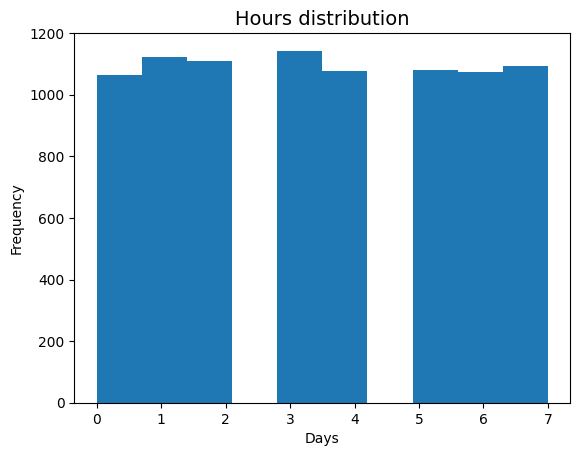

In [56]:
df['Physical Activity Days Per Week'].plot(kind='hist')
plt.title('Hours distribution', fontsize=14)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

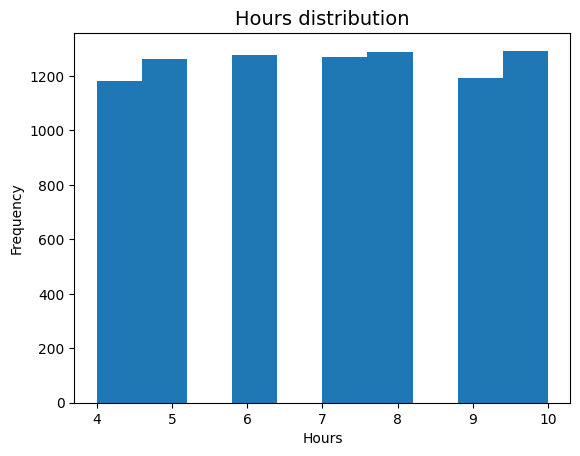

In [57]:
df['Sleep Hours Per Day'].plot(kind='hist')
plt.title('Hours distribution', fontsize=14)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

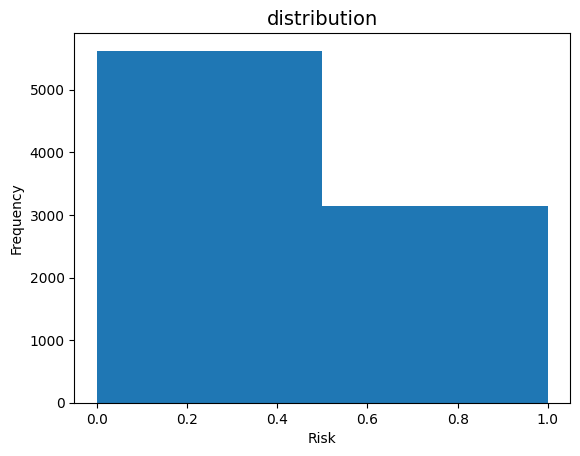

In [58]:
df['Heart Attack Risk'].plot(kind='hist', bins = 2)
plt.title('distribution', fontsize=14)
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.show()

## Scatter Plot

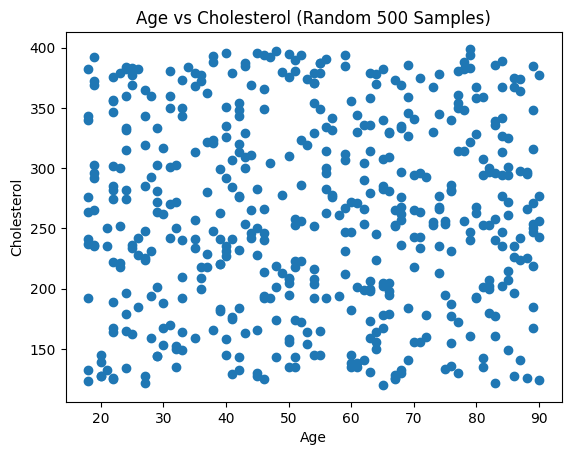

In [59]:
random_sample = df.sample(n=500, random_state=42)
plt.scatter(x=random_sample['Age'], y=random_sample['Cholesterol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol (Random 500 Samples)')
plt.show()

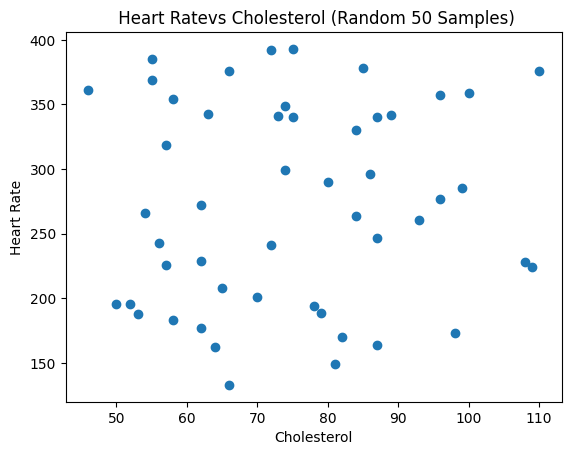

In [60]:
random_sample = df.sample(n=50, random_state=42)
plt.scatter(x=random_sample['Heart Rate'], y=random_sample['Cholesterol'])
plt.xlabel('Cholesterol')
plt.ylabel('Heart Rate')
plt.title(' Heart Ratevs Cholesterol (Random 50 Samples)')
plt.show()

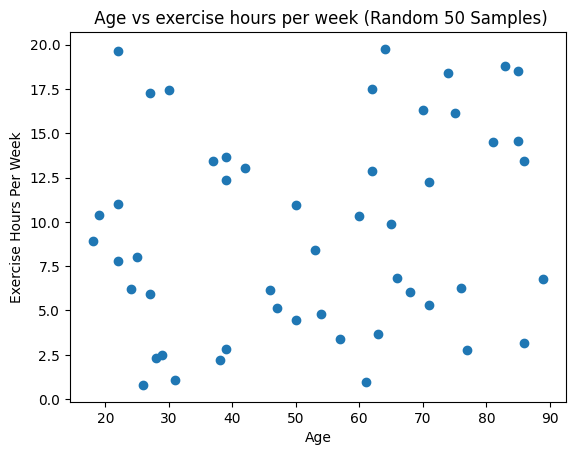

In [61]:
random_sample = df.sample(n=50, random_state=42)
plt.scatter(x=random_sample['Age'], y=random_sample['Exercise Hours Per Week'])
plt.xlabel('Age')
plt.ylabel('Exercise Hours Per Week')
plt.title(' Age vs exercise hours per week (Random 50 Samples)')
plt.show()

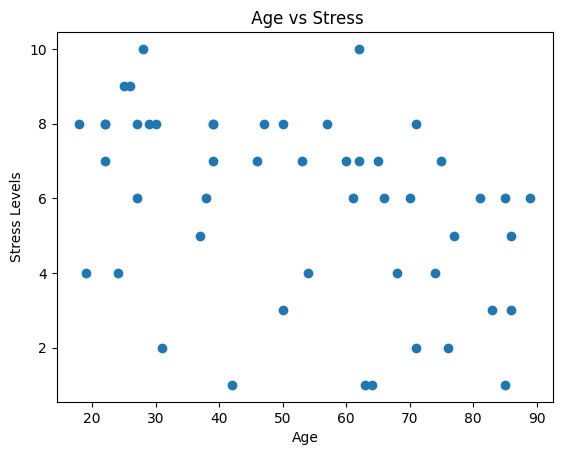

In [62]:
random_sample = df.sample(n=50, random_state=42)
plt.scatter(x=random_sample['Age'], y=random_sample['Stress Level'])
plt.xlabel('Age')
plt.ylabel('Stress Levels')
plt.title(' Age vs Stress')
plt.show()

## Pie charts

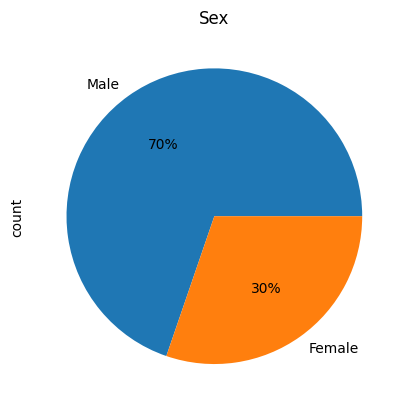

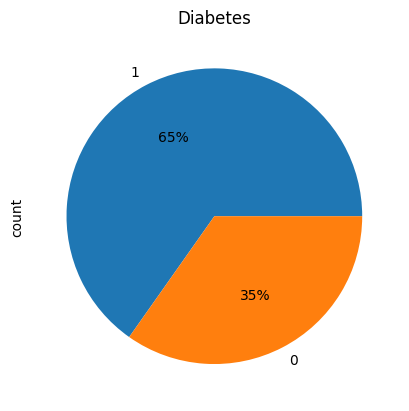

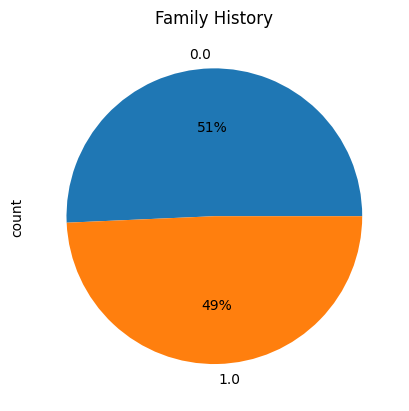

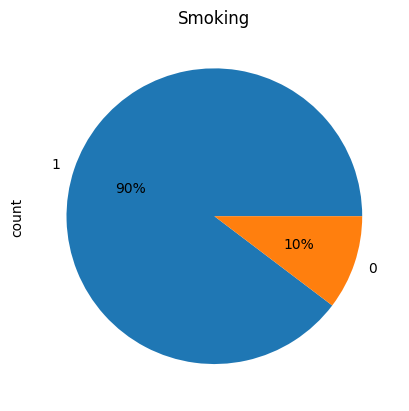

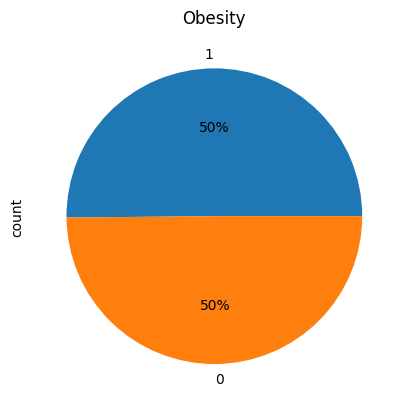

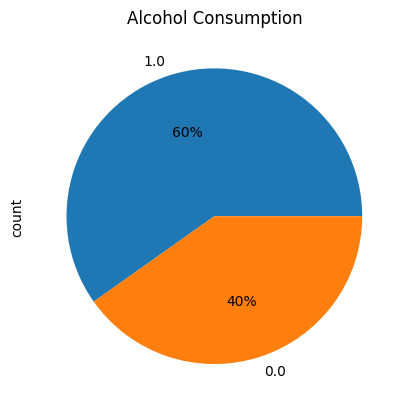

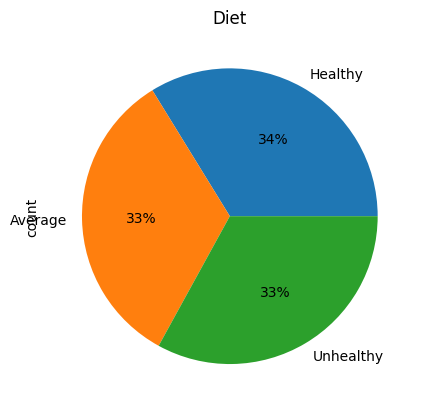

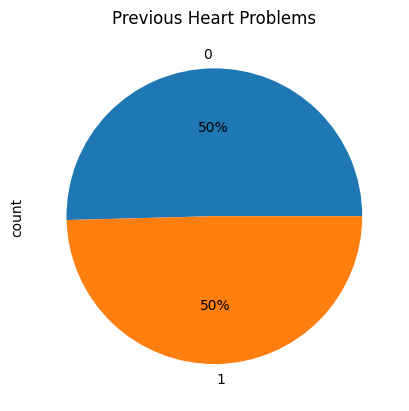

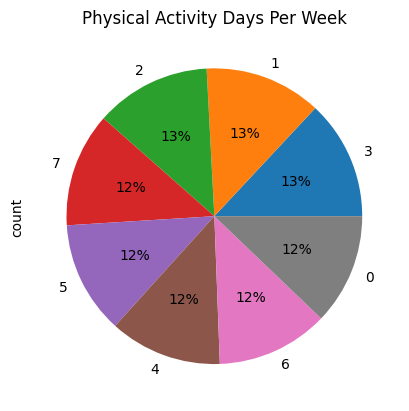

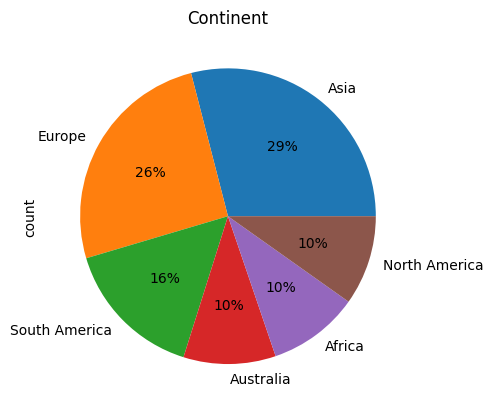

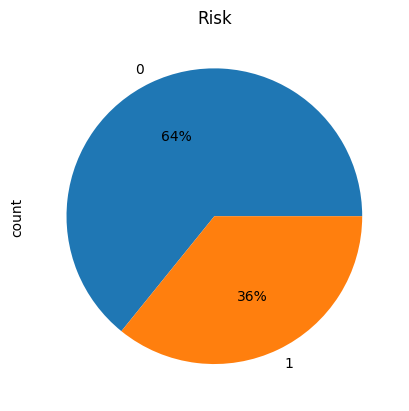

In [63]:
df['Sex'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Sex')
plt.show()

df['Diabetes'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Diabetes')
plt.show()

df['Family History'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Family History')
plt.show()

df['Smoking'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Smoking')
plt.show()

df['Obesity'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Obesity')
plt.show()

df['Alcohol Consumption'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Alcohol Consumption')
plt.show()

df['Diet'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Diet')
plt.show()

df['Previous Heart Problems'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Previous Heart Problems')
plt.show()

df['Physical Activity Days Per Week'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Physical Activity Days Per Week')
plt.show()

df['Continent'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Continent')
plt.show()

df['Heart Attack Risk'].value_counts().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize':10},  )
plt.title('Risk')
plt.show()

## Line plots

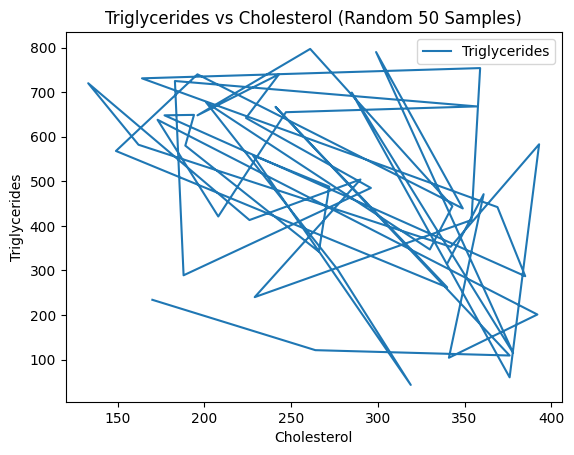

In [64]:
df_sampled = df.sample(n=50, random_state=42)

# Plot
df_sampled.plot(x="Cholesterol", y="Triglycerides", kind="line", title="Triglycerides vs Cholesterol (Random 50 Samples)")
plt.xlabel("Cholesterol")
plt.ylabel("Triglycerides")
plt.show()

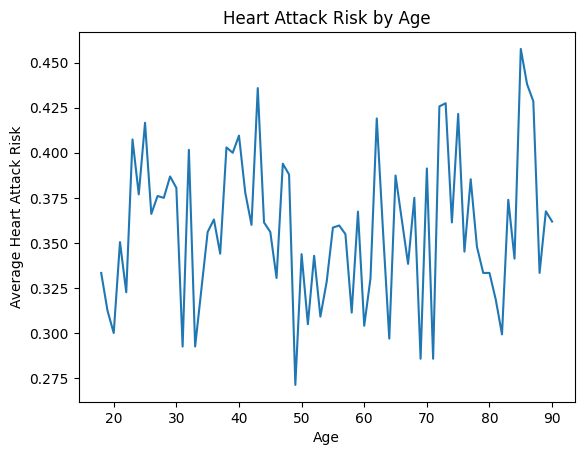

In [65]:
age_risk = df.groupby('Age')['Heart Attack Risk'].mean()
age_risk.plot(kind='line', title='Heart Attack Risk by Age')
plt.xlabel('Age')
plt.ylabel('Average Heart Attack Risk')
plt.show()

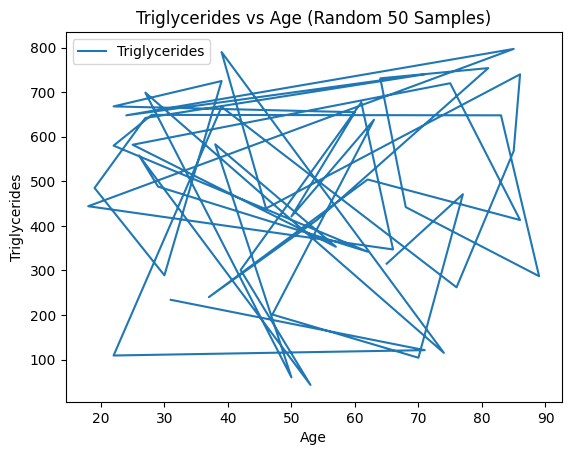

In [66]:
df_sampled = df.sample(n=50, random_state=42)

# Plot
df_sampled.plot(x="Age", y="Triglycerides", kind="line", title="Triglycerides vs Age (Random 50 Samples)")
plt.xlabel("Age")
plt.ylabel("Triglycerides")
plt.show()

## Linear Corr

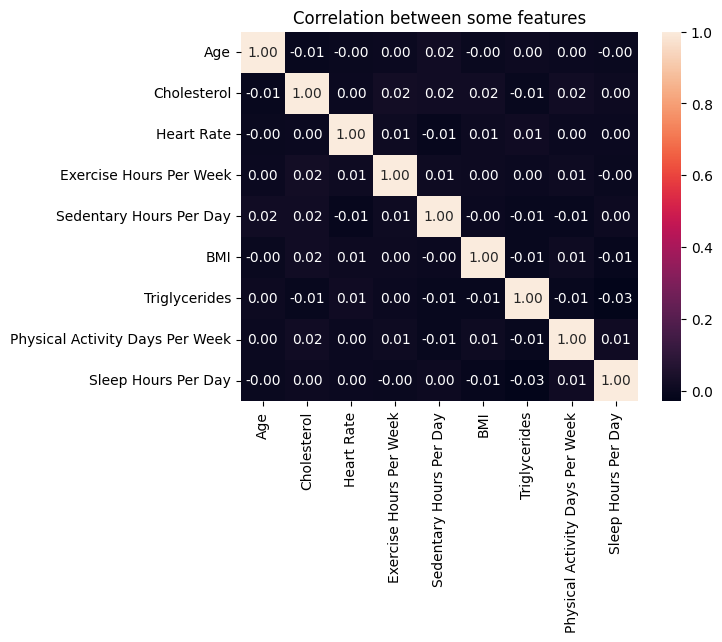

In [67]:
correlation = df[["Age", "Cholesterol", "Heart Rate", "Exercise Hours Per Week", "Sedentary Hours Per Day", "BMI", "Triglycerides","Physical Activity Days Per Week", "Sleep Hours Per Day" ]].corr()

sns.heatmap(correlation, annot=True, fmt='.2f', cbar=True)
plt.title('Correlation between some features')
plt.show()

## Bar charts

<BarContainer object of 2 artists>

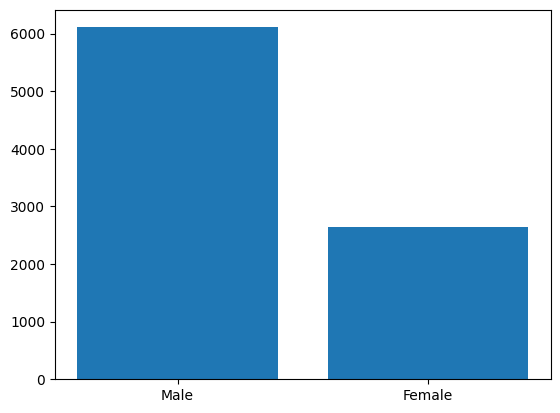

In [90]:
Sex = df['Sex'].value_counts()
plt.bar(Sex.index, Sex.values)

<BarContainer object of 3 artists>

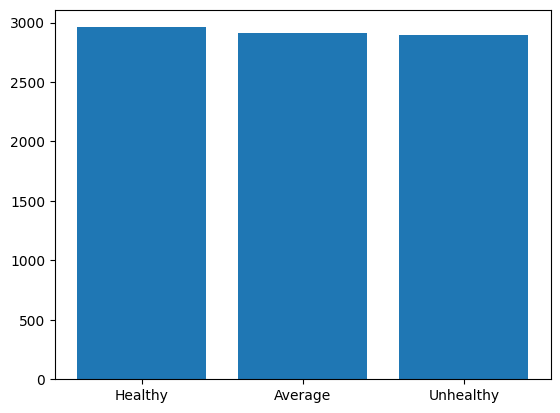

In [89]:
diet = df['Diet'].value_counts()
plt.bar(diet.index, diet.values)

<BarContainer object of 20 artists>

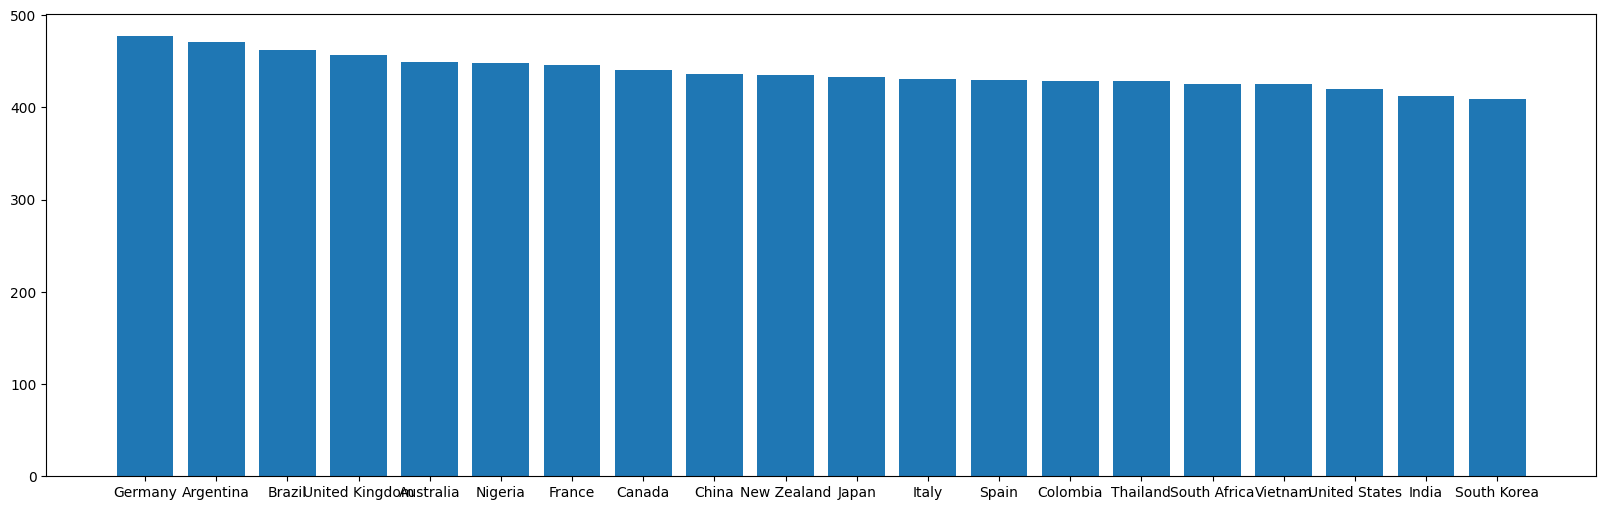

In [88]:
colors = df['Country'].value_counts()
plt.figure(figsize=(20, 6))
plt.bar(colors.index, colors.values)

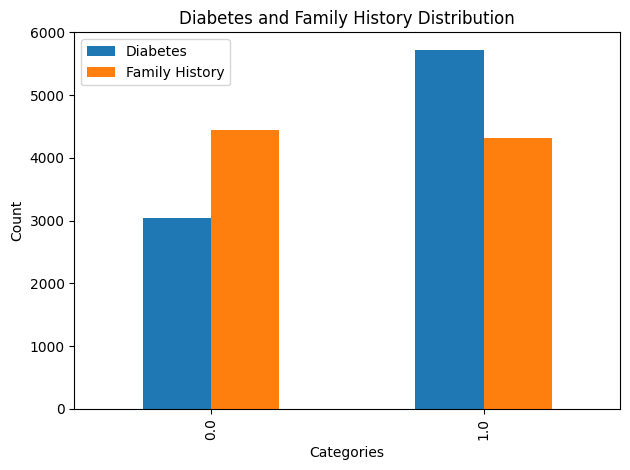

In [91]:
combined_counts = pd.DataFrame({
    'Diabetes':  df['Diabetes'].value_counts(),
    'Family History': df['Family History'].value_counts()
})

# Plotting
combined_counts.plot(kind='bar')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Diabetes and Family History Distribution')
plt.legend()

plt.tight_layout()
plt.show()

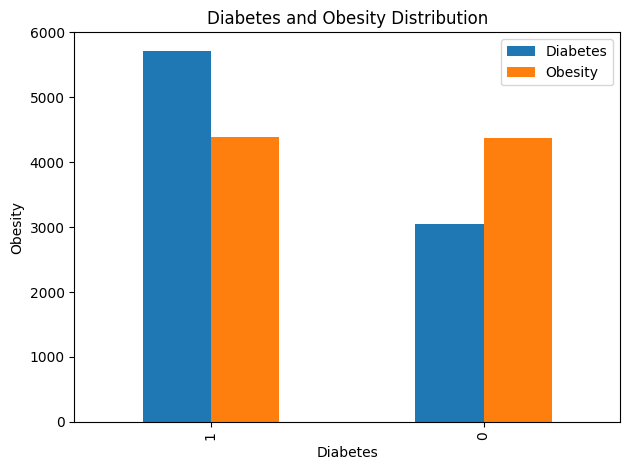

In [87]:
combined_counts = pd.DataFrame({
    'Diabetes':  df['Diabetes'].value_counts(),
    'Obesity': df['Obesity'].value_counts()
})

combined_counts.plot(kind='bar')

plt.xlabel('Diabetes')
plt.ylabel('Obesity')
plt.title('Diabetes and Obesity Distribution')
plt.legend()

plt.tight_layout()
plt.show()

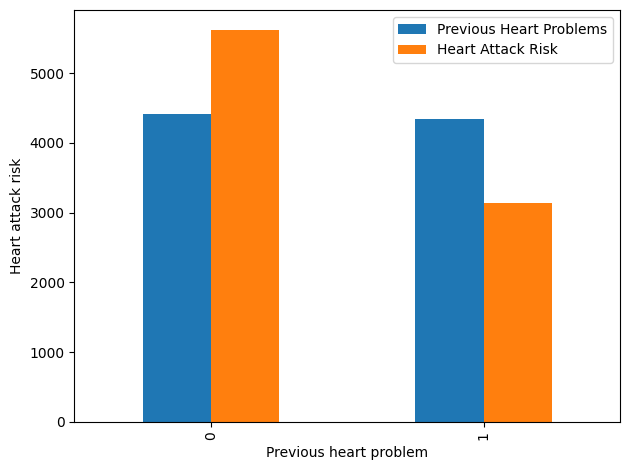

In [86]:
combined_counts = pd.DataFrame({
    'Previous Heart Problems':  df['Previous Heart Problems'].value_counts(),
    'Heart Attack Risk': df['Heart Attack Risk'].value_counts()
})

combined_counts.plot(kind='bar')

plt.xlabel('Previous heart problem')
plt.ylabel('Heart attack risk')
plt.legend()

plt.tight_layout()
plt.show()

## Count plots

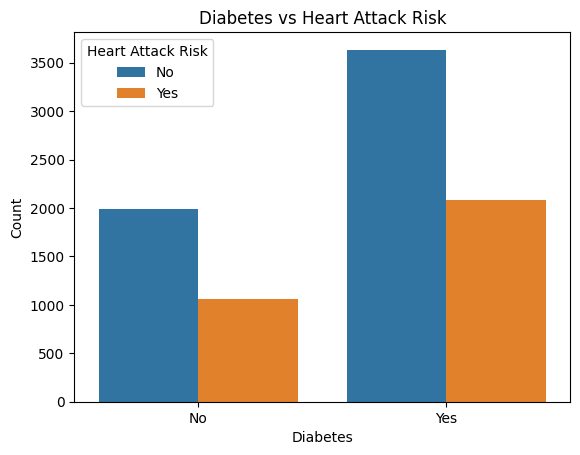

In [74]:
sns.countplot(data=df, x='Diabetes', hue='Heart Attack Risk')
plt.title('Diabetes vs Heart Attack Risk')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes']) 
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

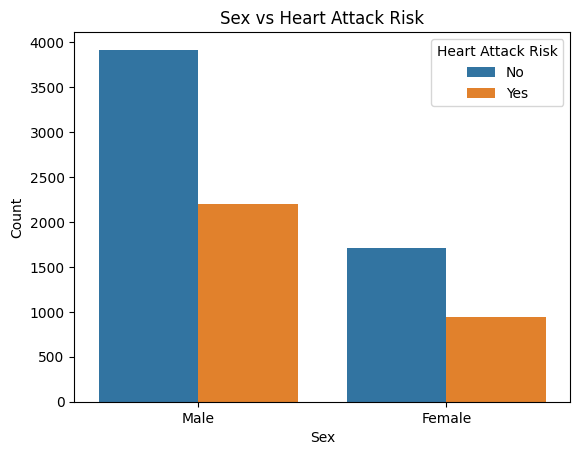

In [75]:
sns.countplot(data=df, x='Sex', hue='Heart Attack Risk')
plt.title('Sex vs Heart Attack Risk')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

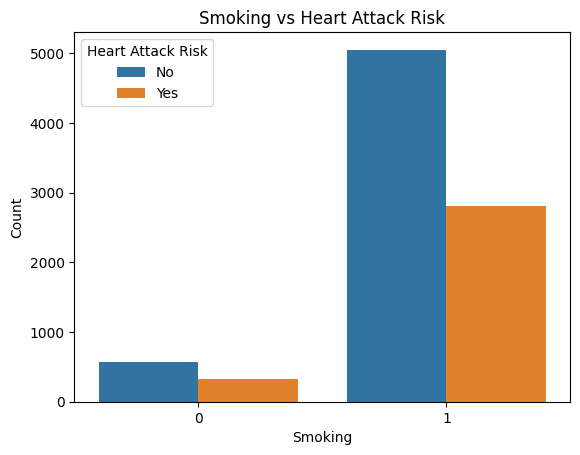

In [85]:
sns.countplot(data=df, x='Smoking', hue='Heart Attack Risk')
plt.title('Smoking vs Heart Attack Risk')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

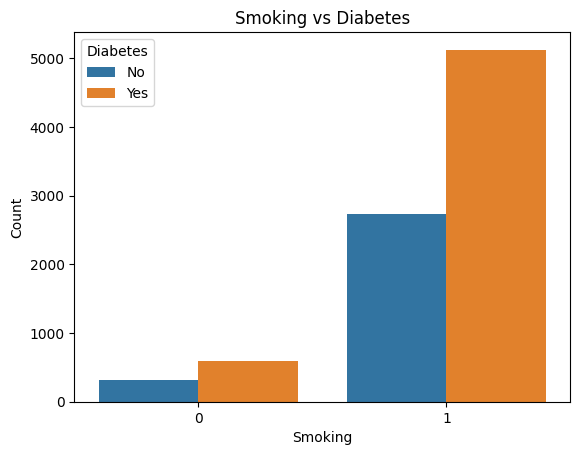

In [83]:
sns.countplot(data=df, x='Smoking', hue='Diabetes')
plt.title('Smoking vs Diabetes')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

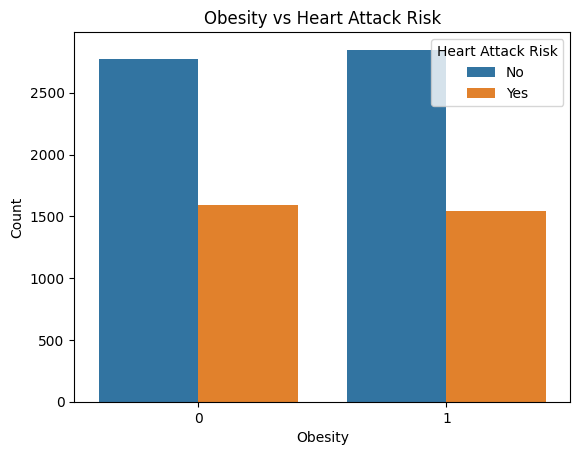

In [84]:
sns.countplot(data=df, x='Obesity', hue='Heart Attack Risk')
plt.title('Obesity vs Heart Attack Risk')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

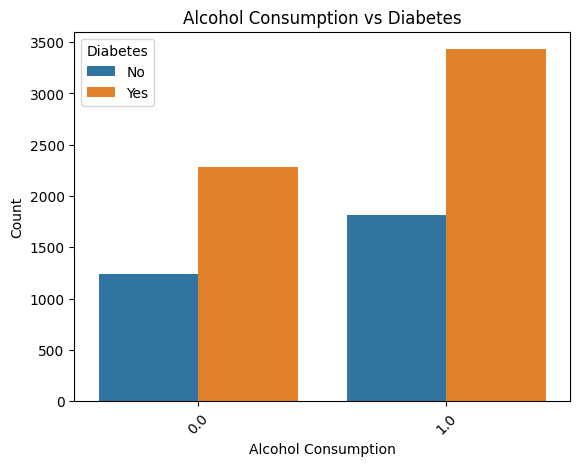

In [79]:
sns.countplot(data=df, x='Alcohol Consumption', hue='Diabetes')
plt.title('Alcohol Consumption vs Diabetes')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

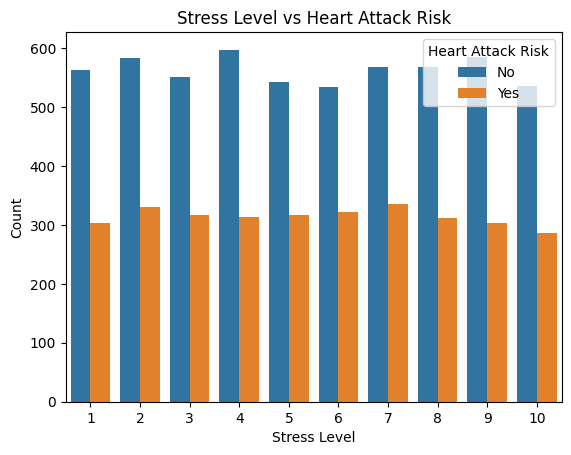

In [80]:
sns.countplot(data=df, x='Stress Level', hue='Heart Attack Risk')
plt.title('Stress Level vs Heart Attack Risk')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

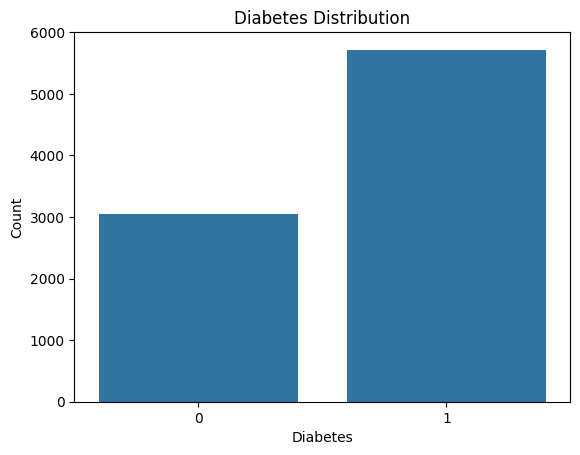

In [81]:
sns.countplot(x='Diabetes', data=df)
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

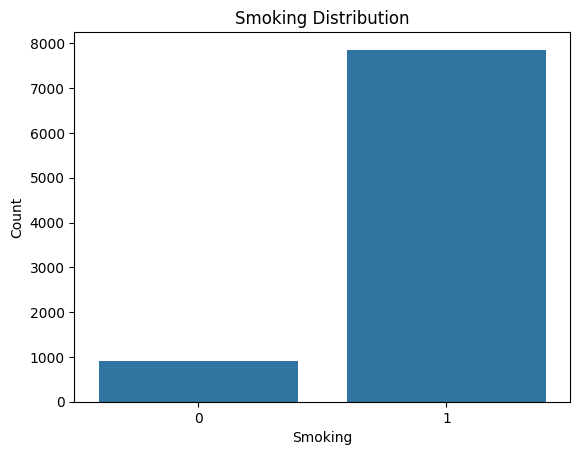

In [82]:
sns.countplot(x='Smoking', data=df)
plt.title('Smoking Distribution')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

## Box and whiskers

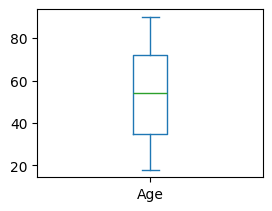

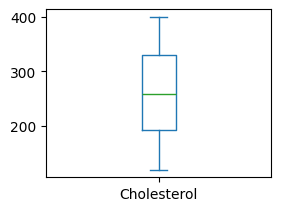

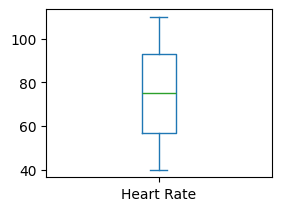

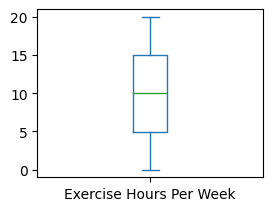

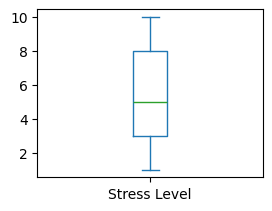

In [92]:
 df["Age"].plot (kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False
)
plt.show()

df["Cholesterol"].plot (kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False
)
plt.show()

df["Heart Rate"].plot (kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False
)
plt.show()

df["Exercise Hours Per Week"].plot (kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False
)
plt.show()
  
df["Stress Level"].plot (kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False
)
plt.show()

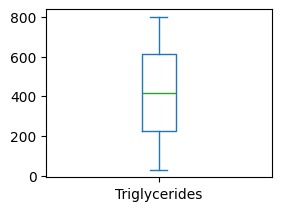

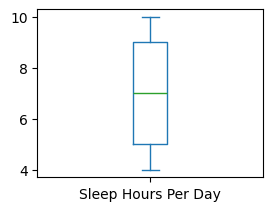

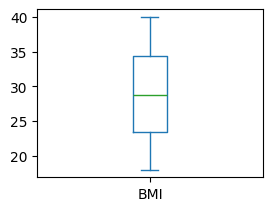

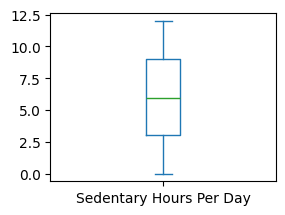

In [93]:
df["Triglycerides"].plot (kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

df["Sleep Hours Per Day"].plot (kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

df["BMI"].plot (kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

df["Sedentary Hours Per Day"].plot (kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

## Scatter Matrix

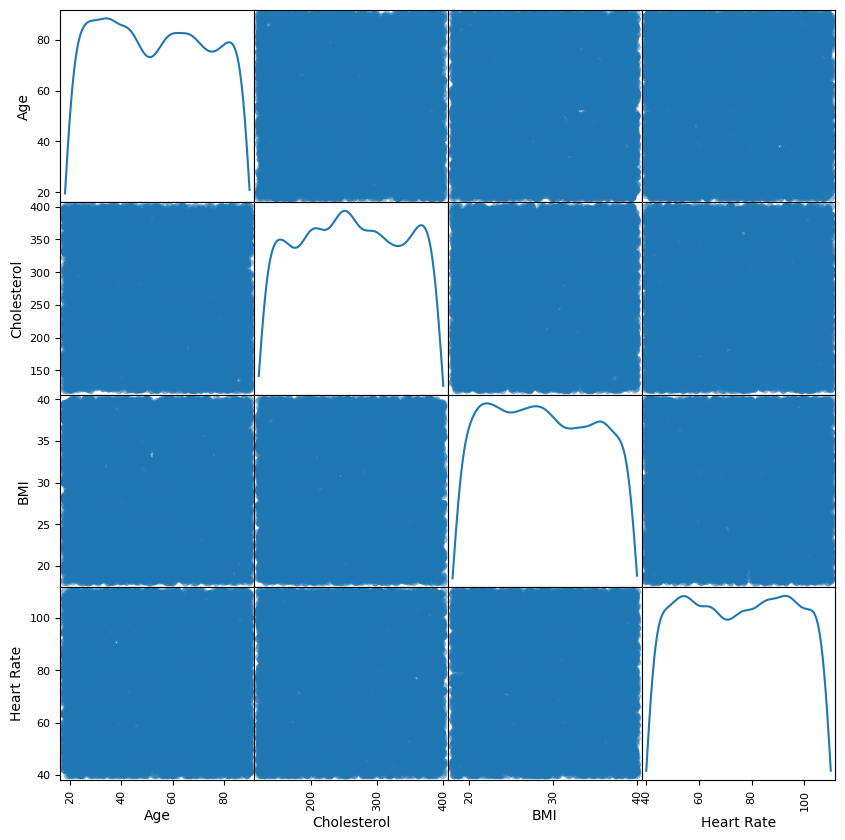

In [94]:
subset_df = df[['Age', 'Cholesterol', 'BMI', 'Blood Pressure', 'Heart Rate']]
scatter_matrix(subset_df, figsize=(10, 10), diagonal='kde', marker='o', alpha=0.5)
plt.show()

## Hexabin

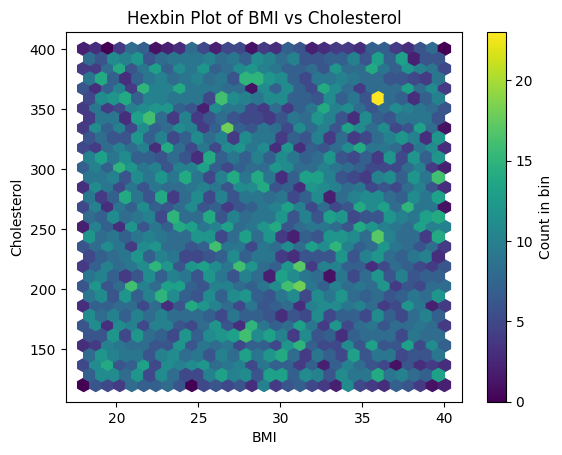

In [95]:
plt.hexbin(
  df["BMI"], 
    df["Cholesterol"],
    gridsize=30, 
    bins=None,  
)

cbar = plt.colorbar(label='Count in bin')  

plt.title('Hexbin Plot of BMI vs Cholesterol')
plt.xlabel('BMI')
plt.ylabel('Cholesterol')

plt.show()

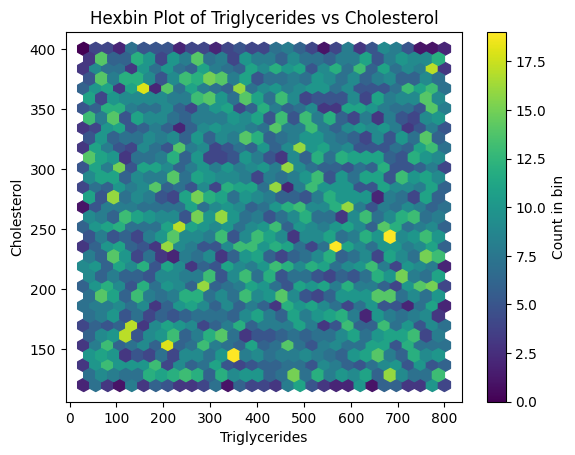

In [96]:
plt.hexbin(
    df["Triglycerides"], 
    df["Cholesterol"], 
    gridsize=30, 
    bins=None,  
)

cbar = plt.colorbar(label='Count in bin')  

plt.title('Hexbin Plot of Triglycerides vs Cholesterol')
plt.xlabel('Triglycerides')
plt.ylabel('Cholesterol')

plt.show()

## Violin plot

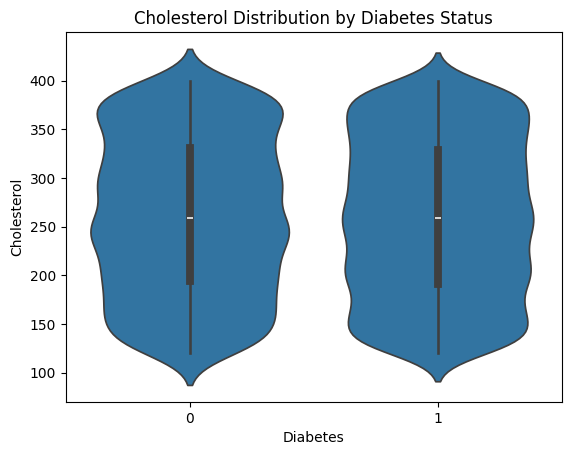

In [97]:
sns.violinplot(x='Diabetes', y='Cholesterol', data=df)

plt.title('Cholesterol Distribution by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('Cholesterol')

plt.show()

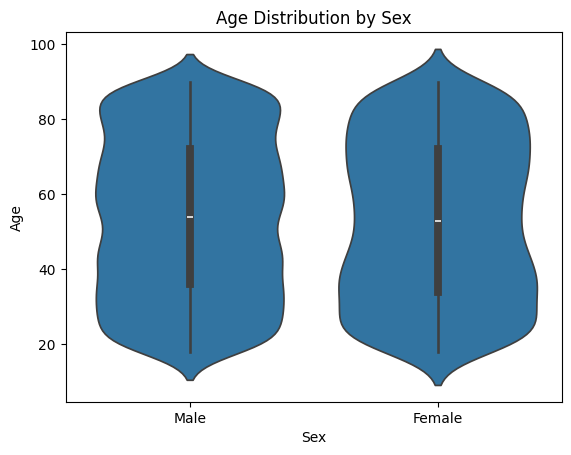

In [98]:
sns.violinplot(x='Sex', y='Age', data=df)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

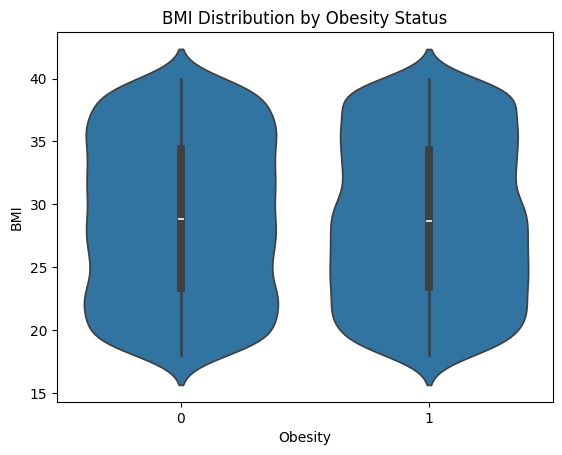

In [100]:
sns.violinplot(x='Obesity', y='BMI', data=df)
plt.title('BMI Distribution by Obesity Status')
plt.xlabel('Obesity')
plt.ylabel('BMI')
plt.show()

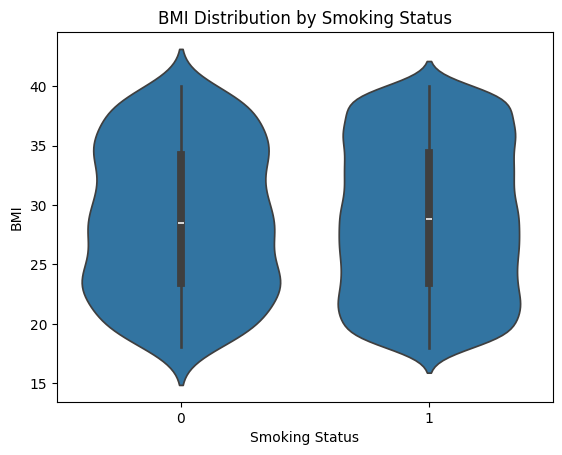

In [101]:
sns.violinplot(x='Smoking', y='BMI', data=df)
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.show()

# Feature engineering

## Dropping features

In [102]:
del df["Patient ID"]

In [103]:
del df["Country"]

In [104]:
del df["Continent"]

In [105]:
del df["Hemisphere"]

In [106]:
del df["Income"]

In [107]:
del df["Medication Use"]

In [108]:
del df["Physical Activity Days Per Week"]

In [109]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Sleep Hours Per Day', 'Heart Attack Risk'],
      dtype='object')

In [110]:
df.shape

(8763, 19)

## Deriving a new column or updating it

In [111]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

In [112]:
del df["Blood Pressure"]

In [113]:
df['Sedentary Hours Per Day'] = df['Sedentary Hours Per Day'].apply(lambda x: str(x).split('.')[0])
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].apply(lambda x: str(x).split('.')[0])

In [114]:
df['BMI'] = df['BMI'].round().astype(int)

In [115]:
df['Exercise Hours Per Week'] = pd.to_numeric(df['Exercise Hours Per Week'])
df['Sedentary Hours Per Day'] = pd.to_numeric(df['Sedentary Hours Per Day'])

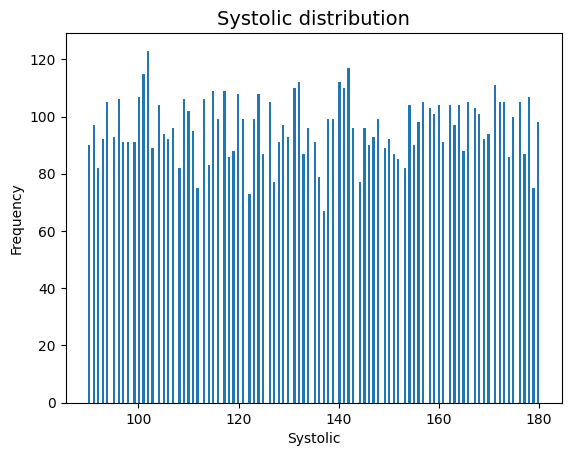

In [116]:
df['Systolic'].plot(kind='hist', bins = 200)
plt.title('Systolic distribution', fontsize=14)
plt.xlabel('Systolic')
plt.ylabel('Frequency')
plt.show()

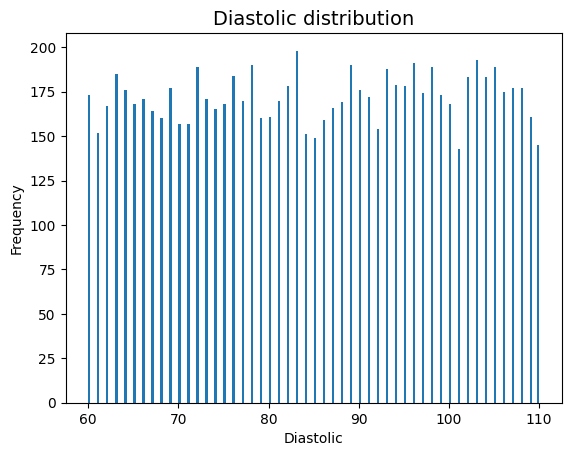

In [117]:
df['Diastolic'].plot(kind='hist', bins = 200)
plt.title('Diastolic distribution', fontsize=14)
plt.xlabel('Diastolic')
plt.ylabel('Frequency')
plt.show()

## Binning

In [118]:
bins = [0, 200, 239, 279, 400]
labels = ['Normal', 'At Risk', 'High', 'Dangerous']
df['Cholesterol'] = pd.cut(df['Cholesterol'], bins=bins, labels=labels, right=True)

## One Hot Encoding

In [119]:
df = pd.get_dummies(df,columns=["Sex", "Diet", "Cholesterol",])

In [120]:
df.dtypes

Age                          int64
Heart Rate                   int64
Diabetes                     int64
Family History             float64
Smoking                      int64
Obesity                      int64
Alcohol Consumption        float64
Exercise Hours Per Week      int64
Previous Heart Problems      int64
Stress Level                 int64
Sedentary Hours Per Day      int64
BMI                          int32
Triglycerides                int64
Sleep Hours Per Day          int64
Heart Attack Risk            int64
Systolic                     int64
Diastolic                    int64
Sex_Female                    bool
Sex_Male                      bool
Diet_Average                  bool
Diet_Healthy                  bool
Diet_Unhealthy                bool
Cholesterol_Normal            bool
Cholesterol_At Risk           bool
Cholesterol_High              bool
Cholesterol_Dangerous         bool
dtype: object

In [121]:
df.shape

(8763, 26)

# Models

# Resampling becuase my rows are not balanced

In [122]:
majority_class = df[df['Heart Attack Risk'] == 0]
minority_class = df[df['Heart Attack Risk'] == 1]

In [123]:
majority_class_undersampled = resample(majority_class,
                                       replace=False,  
                                       n_samples=len(minority_class),  
                                       random_state=42)

In [124]:
df_balanced = pd.concat([majority_class_undersampled, minority_class])

In [125]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [126]:
df_balanced.shape

(6278, 26)

In [127]:
df_balanced["Heart Attack Risk"].value_counts()

Heart Attack Risk
1    3139
0    3139
Name: count, dtype: int64

In [128]:
y = df_balanced["Heart Attack Risk"].to_numpy()
del df_balanced['Heart Attack Risk']
X = df_balanced.to_numpy()

In [129]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.20, random_state=7)

In [133]:
LR = LogisticRegression(solver='liblinear', max_iter=1000)
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier(n_neighbors=10) # even if i increase its the same
CART = DecisionTreeClassifier(max_depth=5, random_state = 7)
NB = GaussianNB()
SVM = SVC(gamma='scale', probability=True)
RF = RandomForestClassifier(class_weight='balanced', max_depth=1000, random_state=42)
GBC = GradientBoostingClassifier(n_estimators=1500, learning_rate=0.01, random_state=7)

In [134]:
LR.fit(X_train, y_train)
LDA.fit(X_train, y_train)
KNN.fit(X_train, y_train)
CART.fit(X_train, y_train)
NB.fit(X_train, y_train)
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,
                           random_state=7)

In [135]:
accuracy_score_LR = accuracy_score(y_test, LR.predict(X_test))
precision_LR = precision_score(y_test, LR.predict(X_test), pos_label=1)
recall_LR = recall_score(y_test, LR.predict(X_test), pos_label=1)
f1_LR = f1_score(y_test, LR.predict(X_test), pos_label=1)
roc_auc_LR = roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1])


accuracy_score_LDA = accuracy_score(y_test, LDA.predict(X_test))
precision_LDA = precision_score(y_test, LDA.predict(X_test), pos_label=1)
recall_LDA = recall_score(y_test, LDA.predict(X_test), pos_label=1)
f1_LDA = f1_score(y_test, LDA.predict(X_test), pos_label=1)
roc_auc_LDA = roc_auc_score(y_test, LDA.predict_proba(X_test)[:, 1])

accuracy_score_KNN = accuracy_score(y_test, KNN.predict(X_test))
precision_KNN = precision_score(y_test, KNN.predict(X_test), pos_label=1)
recall_KNN = recall_score(y_test, KNN.predict(X_test), pos_label=1)
f1_KNN = f1_score(y_test, LDA.predict(X_test), pos_label=1)
roc_auc_KNN = roc_auc_score(y_test, LDA.predict_proba(X_test)[:, 1])

accuracy_score_CART = accuracy_score(y_test, CART.predict(X_test))
precision_CART = precision_score(y_test, CART.predict(X_test), pos_label=1)
recall_CART = recall_score(y_test, CART.predict(X_test), pos_label=1)
f1_CART = f1_score(y_test, LDA.predict(X_test), pos_label=1)
roc_auc_CART = roc_auc_score(y_test, LDA.predict_proba(X_test)[:, 1])

accuracy_score_NB = accuracy_score(y_test, NB.predict(X_test))
precision_NB = precision_score(y_test, NB.predict(X_test), pos_label=1)
recall_NB = recall_score(y_test, NB.predict(X_test), pos_label=1)
f1_NB = f1_score(y_test, NB.predict(X_test), pos_label=1)
roc_auc_NB = roc_auc_score(y_test, NB.predict_proba(X_test)[:, 1])

accuracy_score_SVM = accuracy_score(y_test, SVM.predict(X_test))
precision_SVM = precision_score(y_test, SVM.predict(X_test), pos_label=1)
recall_SVM = recall_score(y_test, SVM.predict(X_test), pos_label=1)
f1_SVM = f1_score(y_test, SVM.predict(X_test), pos_label=1)
roc_auc_SVM = roc_auc_score(y_test, SVM.decision_function(X_test)) 

accuracy_score_RF = accuracy_score(y_test, RF.predict(X_test))
precision_RF = precision_score(y_test, RF.predict(X_test), pos_label=1)
recall_RF = recall_score(y_test, RF.predict(X_test), pos_label=1)
f1_RF = f1_score(y_test, RF.predict(X_test), pos_label=1)
roc_auc_RF = roc_auc_score(y_test, RF.predict_proba(X_test)[:, 1])

accuracy_score_GBC = accuracy_score(y_test, GBC.predict(X_test))
precision_GBC = precision_score(y_test, GBC.predict(X_test), pos_label=1)
recall_GBC = recall_score(y_test, GBC.predict(X_test), pos_label=1)
f1_GBC = f1_score(y_test, GBC.predict(X_test), pos_label=1)
roc_auc_GBC = roc_auc_score(y_test, GBC.predict_proba(X_test)[:, 1])


print('LR:')
print(f"Accuracy: {accuracy_score_LR}")
print(f"Precision: {precision_LR}")
print(f"Recall: {recall_LR}")
print(f"F1-Score: {f1_LR}")
print(f"ROC-AUC: {roc_auc_LR}")
print()

print('LDA:')
print(f"Accuracy: {accuracy_score_LDA}")
print(f"Precision: {precision_LDA}")
print(f"Recall: {recall_LDA}")
print(f"F1-Score: {f1_LDA}")
print(f"ROC-AUC: {roc_auc_LDA}")
print()

print('KNN:')
print(f"Accuracy: {accuracy_score_KNN}")
print(f"Precision: {precision_KNN}")
print(f"Recall: {recall_KNN}")
print(f"F1-Score: {f1_KNN}")
print(f"ROC-AUC: {roc_auc_KNN}")
print()

print('CART:')
print(f"Accuracy: {accuracy_score_CART}")
print(f"Precision: {precision_CART}")
print(f"Recall: {recall_CART}")
print(f"F1-Score: {f1_CART}")
print(f"ROC-AUC: {roc_auc_CART}")
print()

print('NB:')
print(f"Accuracy: {accuracy_score_NB}")
print(f"Precision: {precision_NB}")
print(f"Recall: {recall_NB}")
print(f"F1-Score: {f1_NB}")
print(f"ROC-AUC: {roc_auc_NB}")
print()

print('SVM:')
print(f"Accuracy: {accuracy_score_SVM}")
print(f"Precision: {precision_SVM}")
print(f"Recall: {recall_SVM}")
print(f"F1-Score: {f1_SVM}")
print(f"ROC-AUC: {roc_auc_SVM}")
print()

print('RF:')
print(f"Accuracy: {accuracy_score_RF}")
print(f"Precision: {precision_RF}")
print(f"Recall: {recall_RF}")
print(f"F1-Score: {f1_RF}")
print(f"ROC-AUC: {roc_auc_RF}")
print()

print('GBC:')
print(f"Accuracy: {accuracy_score_GBC}")
print(f"Precision: {precision_GBC}")
print(f"Recall: {recall_GBC}")
print(f"F1-Score: {f1_GBC}")
print(f"ROC-AUC: {roc_auc_GBC}")
print()

LR:
Accuracy: 0.47611464968152867
Precision: 0.4790996784565916
Recall: 0.47151898734177217
F1-Score: 0.47527910685805425
ROC-AUC: 0.48399464459591035

LDA:
Accuracy: 0.47770700636942676
Precision: 0.48083067092651754
Recall: 0.4762658227848101
F1-Score: 0.4785373608903021
ROC-AUC: 0.48360921778643295

KNN:
Accuracy: 0.5015923566878981
Precision: 0.5064935064935064
Recall: 0.370253164556962
F1-Score: 0.4785373608903021
ROC-AUC: 0.48360921778643295

CART:
Accuracy: 0.49601910828025475
Precision: 0.49842271293375395
Recall: 0.25
F1-Score: 0.4785373608903021
ROC-AUC: 0.48360921778643295

NB:
Accuracy: 0.482484076433121
Precision: 0.48615384615384616
Recall: 0.5
F1-Score: 0.49297971918876754
ROC-AUC: 0.48151979876663425

SVM:
Accuracy: 0.5199044585987261
Precision: 0.5298969072164949
Recall: 0.40664556962025317
F1-Score: 0.4601611459265891
ROC-AUC: 0.5233487504057124

RF:
Accuracy: 0.5023885350318471
Precision: 0.5059021922428331
Recall: 0.47468354430379744
F1-Score: 0.4897959183673469
ROC

In [136]:
print("Confusion matrix:")
print(confusion_matrix(y_test, GBC.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, GBC.predict(X_test)))

Confusion matrix:
[[319 305]
 [322 310]]
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.50       624
           1       0.50      0.49      0.50       632

    accuracy                           0.50      1256
   macro avg       0.50      0.50      0.50      1256
weighted avg       0.50      0.50      0.50      1256



## Using regression models to determine the risk based on the percentages

In [137]:
RFR = RandomForestRegressor(random_state = 7 , max_depth = 20)
LR = LogisticRegression( max_iter=1000, random_state = 7,)
GBR = GradientBoostingRegressor(random_state = 7)

RFR.fit(X_train, y_train)
LR.fit(X_train, y_train)
GBR.fit(X_train, y_train)

accuracy_score_LR = accuracy_score(y_test, LR.predict(X_test))
precision_LR = precision_score(y_test, LR.predict(X_test))
recall_LR = recall_score(y_test, LR.predict(X_test))
f1_LR = f1_score(y_test, LR.predict(X_test))
roc_auc_LR = roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1])

RFR_predictions = (RFR.predict(X_test) >= 0.5).astype(int)  
accuracy_score_RFR = accuracy_score(y_test, RFR_predictions)
precision_RFR = precision_score(y_test, RFR_predictions)
recall_RFR = recall_score(y_test, RFR_predictions)
f1_RFR = f1_score(y_test, RFR_predictions)
roc_auc_RFR = roc_auc_score(y_test, RFR.predict(X_test)) 

GBR_predictions = (GBR.predict(X_test) >= 0.5).astype(int)  
accuracy_score_GBR = accuracy_score(y_test, GBR_predictions)
precision_GBR = precision_score(y_test, GBR_predictions)
recall_GBR = recall_score(y_test, GBR_predictions)
f1_GBR = f1_score(y_test, GBR_predictions)
roc_auc_GBR = roc_auc_score(y_test, GBR.predict(X_test)) 


print("\nRandom Forest Regressor:")
print(f"Accuracy: {accuracy_score_RFR}, Precision: {precision_RFR}, Recall: {recall_RFR}, F1: {f1_RFR}, ROC-AUC: {roc_auc_RFR}")

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score_LR}, Precision: {precision_LR}, Recall: {recall_LR}, F1: {f1_LR}, ROC-AUC: {roc_auc_LR}")

print("\nGradient Boosting Regressor:")
print(f"Accuracy: {accuracy_score_GBR}, Precision: {precision_GBR}, Recall: {recall_GBR}, F1: {f1_GBR}, ROC-AUC: {roc_auc_GBR}")

C:\Users\RAGATP\.conda\envs\MLDV\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Regressor:
Accuracy: 0.4864649681528662, Precision: 0.4897959183673469, Recall: 0.4936708860759494, F1: 0.491725768321513, ROC-AUC: 0.49941298482635504
Logistic Regression:
Accuracy: 0.48487261146496813, Precision: 0.48796147672552165, Recall: 0.4810126582278481, F1: 0.48446215139442234, ROC-AUC: 0.48558199448231093

Gradient Boosting Regressor:
Accuracy: 0.4984076433121019, Precision: 0.5016666666666667, Recall: 0.4762658227848101, F1: 0.48863636363636365, ROC-AUC: 0.5096559558584874


In [138]:
# this has the highest recall and highest F1 score
print("Confusion matrix:")
print(confusion_matrix(y_test, RFR_predictions))
print("Classification report:")
print(classification_report(y_test, RFR_predictions))

Confusion matrix:
[[299 325]
 [320 312]]
Classification report:
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       624
           1       0.49      0.49      0.49       632

    accuracy                           0.49      1256
   macro avg       0.49      0.49      0.49      1256
weighted avg       0.49      0.49      0.49      1256



## Performing grid search and using optuna to find the best parameters

In [ ]:
RF = RandomForestClassifier(random_state = 7)

param_grid = {
    'n_estimators': [300, 1000, 1500],                   
    'max_depth': [ 5, 10],           
    'min_samples_split': [ 20, 50],                   
    'min_samples_leaf': [  10, 20],    
    'class_weight': ['balanced', {0: 1, 1: 10}]
}

gs_cv = GridSearchCV(RF, param_grid, n_jobs=2, verbose=100)

gs_cv.fit(X_train, y_train)

print(gs_cv.best_params_)

In [ ]:
# result: Class weight: Balanced, Max depth: 10, Min Samples leaf: 10, Min Samples split: 20, N_estimatators: 300

In [139]:
RF = RandomForestClassifier(class_weight='balanced', max_depth=10, min_samples_leaf = 10, min_samples_split = 20, n_estimators = 300, random_state=42)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

accuracy_RF = accuracy_score(y_test, y_pred)
precision_RF = precision_score(y_test, y_pred, average='weighted')
recall_RF = recall_score(y_test, y_pred, average='weighted')
f1_RF = f1_score(y_test, y_pred, average='weighted')

print('RF:')
print(f"Accuracy: {accuracy_RF}")
print(f"Precision: {precision_RF}")
print(f"Recall: {recall_RF}")
print(f"F1 Score: {f1_RF}")

RF:
Accuracy: 0.5023885350318471
Precision: 0.5026176367116908
Recall: 0.5023885350318471
F1 Score: 0.5019134350961256


In [ ]:
GBC = GradientBoostingClassifier(random_state = 7)

param_grid = {
    'n_estimators': [ 1000, 1500],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [5,10,15,20],
     'min_samples_split': [10,15]

}

gs_cv = GridSearchCV(GBC, param_grid, n_jobs=2, verbose=100)

gs_cv.fit(X_train, y_train)

print(gs_cv.best_params_)

In [ ]:
# result: Learning rate: 0.05, Max depth: 3, Min Samples leaf: 5, Min Samples split: 15, N_estimatators: 1000

In [143]:
GBC = GradientBoostingClassifier( max_depth=3, min_samples_leaf = 5, min_samples_split = 15, n_estimators = 1000, learning_rate = 0.05, random_state=7)
GBC.fit(X_train, y_train)

y_pred = GBC.predict(X_test)

accuracy_GBC = accuracy_score(y_test, y_pred)
precision_GBC = precision_score(y_test, y_pred)
recall_GBC = recall_score(y_test, y_pred)
f1_GBC = f1_score(y_test, y_pred)

print('GBC:')
print(f"Accuracy: {accuracy_GBC}")
print(f"Precision: {precision_GBC}")
print(f"Recall: {recall_GBC}")
print(f"F1 Score: {f1_GBC}")

GBC:
Accuracy: 0.49601910828025475
Precision: 0.4992
Recall: 0.4936708860759494
F1 Score: 0.4964200477326969


In [ ]:
start = time()

speed = {}
model = ensemble.GradientBoostingClassifier()

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 6),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'min_samples_split': trial.suggest_int('min_samples_split', 10, 15),
    }
    model.set_params(**params)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy_GBC = accuracy_score(y_test, y_pred)

    return accuracy_GBC

study = optuna.create_study(direction='maximize')  # Use 'maximize' for accuracy
study.optimize(objective, n_trials=30)

print("Best Parameters:", study.best_params)

speed['GradientBoosting'] = np.round(time() - start, 3)

print(f"Run time: {speed['GradientBoosting']}s")

In [ ]:
# Best Parameter result: N estimators: 606, Mx_depth: 3, Min samples leaf: 17, Learning rate: 0.0188, Min samples split: 14

In [140]:
randomForest = RandomForestRegressor(random_state = 7)

param_grid = {
    'n_estimators': [1000, 1500],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [5, 10],
    'min_samples_split': [20, 50]
}

gs_cv = GridSearchCV(randomForest, param_grid, n_jobs=2, verbose=100)

gs_cv.fit(X_train, y_train)

print(gs_cv.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 1500}


In [141]:
RFR = RandomForestRegressor( max_depth = 3, min_samples_leaf = 5, min_samples_split = 20, n_estimators = 1500  )
RFR.fit(X_train, y_train)

RFR_predictions = (RFR.predict(X_test) >= 0.5).astype(int)  
accuracy_score_RFR = accuracy_score(y_test, RFR_predictions)
precision_RFR = precision_score(y_test, RFR_predictions, pos_label=1)
recall_RFR = recall_score(y_test, RFR_predictions, pos_label=1)
f1_RFR = f1_score(y_test, RFR_predictions, pos_label=1)
roc_auc_RFR = roc_auc_score(y_test, RFR.predict(X_test)) 

print("\nRandom Forest Regressor:")
print(f"Accuracy: {accuracy_score_RFR}, Precision: {precision_RFR}, Recall: {recall_RFR}, F1: {f1_RFR}, ROC-AUC: {roc_auc_RFR}")


Random Forest Regressor:
Accuracy: 0.518312101910828, Precision: 0.5285412262156448, Recall: 0.39556962025316456, F1: 0.45248868778280543, ROC-AUC: 0.5188909850697825


In [ ]:
GBC = GradientBoostingRegressor(random_state = 7)

param_grid = {
    'n_estimators': [ 1000, 1500],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [10,15]
}

gs_cv = GridSearchCV(GBC, param_grid, n_jobs=2, verbose=100)

gs_cv.fit(X_train, y_train)

print(gs_cv.best_params_)

In [ ]:
# Best Parameter result: N estimators: 1000, Mx_depth: 3, Min samples leaf: 15, Learning rate: 0.01, Min samples split: 10

### Selecting a model and setting the hyperparameters based on the grid search and manually selecting

In [144]:
RFR = RandomForestRegressor( max_depth = 10, min_samples_split = 20, n_estimators = 500, random_state = 7)
GBR = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 3,min_samples_leaf = 15, min_samples_split = 10, n_estimators = 100 , random_state = 7)

RFR.fit(X_train, y_train)
GBR.fit(X_train, y_train)


RFR_predictions = (RFR.predict(X_test) >= 0.5).astype(int)  
accuracy_score_RFR = accuracy_score(y_test, RFR_predictions)
precision_RFR = precision_score(y_test, RFR_predictions, pos_label=1)
recall_RFR = recall_score(y_test, RFR_predictions, pos_label=1)
f1_RFR = f1_score(y_test, RFR_predictions, pos_label=1)
roc_auc_RFR = roc_auc_score(y_test, RFR.predict(X_test)) 

GBR_predictions = (GBR.predict(X_test) >= 0.5).astype(int)  
accuracy_score_GBR = accuracy_score(y_test, GBR_predictions)
precision_GBR = precision_score(y_test, GBR_predictions, pos_label=1)
recall_GBR = recall_score(y_test, GBR_predictions, pos_label=1)
f1_GBR = f1_score(y_test, GBR_predictions, pos_label=1)
roc_auc_GBR = roc_auc_score(y_test, GBR.predict(X_test)) 


print("\nRandom Forest Regressor:")
print(f"Accuracy: {accuracy_score_RFR}, Precision: {precision_RFR}, Recall: {recall_RFR}, F1: {f1_RFR}, ROC-AUC: {roc_auc_RFR}")

print("\nGradient Boosting Regressor:")
print(f"Accuracy: {accuracy_score_GBR}, Precision: {precision_GBR}, Recall: {recall_GBR}, F1: {f1_GBR}, ROC-AUC: {roc_auc_GBR}")


Random Forest Regressor:
Accuracy: 0.517515923566879, Precision: 0.5219594594594594, Recall: 0.4889240506329114, F1: 0.5049019607843137, ROC-AUC: 0.5142126135994807

Gradient Boosting Regressor:
Accuracy: 0.5079617834394905, Precision: 0.5158371040723982, Recall: 0.36075949367088606, F1: 0.4245810055865922, ROC-AUC: 0.5158405347289841


In [145]:
RFR = RandomForestRegressor( max_depth = 20, min_samples_split = 50, n_estimators = 500 , random_state = 7 )
RFR.fit(X_train, y_train)

RFR_predictions = (RFR.predict(X_test) >= 0.5).astype(int)  
accuracy_score_RFR = accuracy_score(y_test, RFR_predictions)
precision_RFR = precision_score(y_test, RFR_predictions, pos_label=1)
recall_RFR = recall_score(y_test, RFR_predictions, pos_label=1)
f1_RFR = f1_score(y_test, RFR_predictions, pos_label=1)
roc_auc_RFR = roc_auc_score(y_test, RFR.predict(X_test)) 

print("\nRandom Forest Regressor:")
print(f"Accuracy: {accuracy_score_RFR}, Precision: {precision_RFR}, Recall: {recall_RFR}, F1: {f1_RFR}, ROC-AUC: {roc_auc_RFR}")


Random Forest Regressor:
Accuracy: 0.5143312101910829, Precision: 0.5177419354838709, Recall: 0.5079113924050633, F1: 0.512779552715655, ROC-AUC: 0.5109238072054527


In [150]:
rf = RandomForestRegressor(max_depth = 50, random_state = 7)
rf.fit(X_train, y_train)

rf_predictions = (rf.predict(X_test) >= 0.5).astype(int)  
accuracy_score_RFR = accuracy_score(y_test, rf_predictions)
precision_RFR = precision_score(y_test, rf_predictions, pos_label=1)
recall_RFR = recall_score(y_test, rf_predictions, pos_label=1)
f1_RFR = f1_score(y_test, rf_predictions, pos_label=1)
roc_auc_RFR = roc_auc_score(y_test, rf.predict(X_test)) 

print("\nRandom Forest Regressor:")
print(f"Accuracy: {accuracy_score_RFR}, Precision: {precision_RFR}, Recall: {recall_RFR}, F1: {f1_RFR}, ROC-AUC: {roc_auc_RFR}")


Random Forest Regressor:
Accuracy: 0.5, Precision: 0.5030487804878049, Recall: 0.5221518987341772, F1: 0.5124223602484472, ROC-AUC: 0.4924245882018825


In [151]:
#F1 is not doing well
rf = RandomForestRegressor(max_depth= 3, min_samples_leaf= 10, min_samples_split =20, n_estimators= 1500, random_state = 7)
rf.fit(X_train, y_train)

rf_pred = (rf.predict(X_test) >= 0.5).astype(int)  
accuracy_score_RFR = accuracy_score(y_test, rf_pred)
precision_RFR = precision_score(y_test, rf_pred, pos_label=1)
recall_RFR = recall_score(y_test, rf_pred, pos_label=1)
f1_RFR = f1_score(y_test, rf_pred, pos_label=1)
roc_auc_RFR = roc_auc_score(y_test, rf.predict(X_test)) 

print("\nRandom Forest Regressor:")
print(f"Accuracy: {accuracy_score_RFR}, Precision: {precision_RFR}, Recall: {recall_RFR}, F1: {f1_RFR}, ROC-AUC: {roc_auc_RFR}")


Random Forest Regressor:
Accuracy: 0.5159235668789809, Precision: 0.5245901639344263, Recall: 0.4050632911392405, F1: 0.45714285714285713, ROC-AUC: 0.5175369198312236


In [152]:
#original
rf = RandomForestRegressor(max_depth= 20, random_state = 7)
rf.fit(X_train, y_train)

RFR_predictions = (rf.predict(X_test) >= 0.5).astype(int)  
accuracy_score_RFR = accuracy_score(y_test, RFR_predictions)
precision_RFR = precision_score(y_test, RFR_predictions, pos_label=1)
recall_RFR = recall_score(y_test, RFR_predictions, pos_label=1)
f1_RFR = f1_score(y_test, RFR_predictions, pos_label=1)
roc_auc_RFR = roc_auc_score(y_test, rf.predict(X_test)) 

print("\nRandom Forest Regressor:")
print(f"Accuracy: {accuracy_score_RFR}, Precision: {precision_RFR}, Recall: {recall_RFR}, F1: {f1_RFR}, ROC-AUC: {roc_auc_RFR}")


Random Forest Regressor:
Accuracy: 0.4864649681528662, Precision: 0.4897959183673469, Recall: 0.4936708860759494, F1: 0.491725768321513, ROC-AUC: 0.49941298482635504


In [ ]:
#hyperparameter tuning
rf_hyp = RandomForestRegressor(max_depth = 15,random_state = 7, n_estimators=500, min_samples_leaf=2)
rf_hyp.fit(X_train, y_train)

RFR_predictions = (rf_hyp.predict(X_test) >= 0.5).astype(int)  
accuracy_score_RFR = accuracy_score(y_test, RFR_predictions)
precision_RFR = precision_score(y_test, RFR_predictions, pos_label=1)
recall_RFR = recall_score(y_test, RFR_predictions, pos_label=1)
f1_RFR = f1_score(y_test, RFR_predictions, pos_label=1)
roc_auc_RFR = roc_auc_score(y_test, rf_hyp.predict(X_test)) 

print("\nRandom Forest Regressor:")
print(f"Accuracy: {accuracy_score_RFR}, Precision: {precision_RFR}, Recall: {recall_RFR}, F1: {f1_RFR}, ROC-AUC: {roc_auc_RFR}")

In [ ]:
print("Confusion matrix:")
print(confusion_matrix(y_test, RFR_predictions))
print("Classification report:")
print(classification_report(y_test, RFR_predictions))

# Final chosen parameters.

In [146]:
#hyperparameter tuning
rf_hyp = RandomForestRegressor(max_depth = 15,random_state = 7, n_estimators=500, min_samples_leaf=2)
rf_hyp.fit(X_train, y_train)

RFR_predictions = (rf_hyp.predict(X_test) >= 0.5).astype(int)  
accuracy_score_RFR = accuracy_score(y_test, RFR_predictions)
precision_RFR = precision_score(y_test, RFR_predictions, pos_label=1)
recall_RFR = recall_score(y_test, RFR_predictions, pos_label=1)
f1_RFR = f1_score(y_test, RFR_predictions, pos_label=1)
roc_auc_RFR = roc_auc_score(y_test, rf_hyp.predict(X_test)) 

print("\nRandom Forest Regressor:")
print(f"Accuracy: {accuracy_score_RFR}, Precision: {precision_RFR}, Recall: {recall_RFR}, F1: {f1_RFR}, ROC-AUC: {roc_auc_RFR}")


Random Forest Regressor:
Accuracy: 0.5127388535031847, Precision: 0.5160256410256411, Recall: 0.509493670886076, F1: 0.5127388535031847, ROC-AUC: 0.5153283227848101


In [147]:
print("Confusion matrix:")
print(confusion_matrix(y_test, RFR_predictions))
print("Classification report:")
print(classification_report(y_test, RFR_predictions))

Confusion matrix:
[[322 302]
 [310 322]]
Classification report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       624
           1       0.52      0.51      0.51       632

    accuracy                           0.51      1256
   macro avg       0.51      0.51      0.51      1256
weighted avg       0.51      0.51      0.51      1256



## Saving the model

In [ ]:
joblib.dump(rf_hyp,'models/random_forest_reg_with_hyperparameters_model.pkl')

## Feature importance

In [ ]:
feature_labels = np.array(['Age', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Stress Level', 'Sedentary Hours Per Day',
       'BMI', 'Triglycerides', 'Sleep Hours Per Day', 'Systolic', 'Diastolic',
       'Sex_Female', 'Sex_Male', 'Diet_Average', 'Diet_Healthy',
       'Diet_Unhealthy', 'Cholesterol_Normal', 'Cholesterol_At Risk',
       'Cholesterol_High', 'Cholesterol_Dangerous'])

model = joblib.load("models/random_forest_reg_with_hyperparameters_model.pkl")


importance = model.feature_importances_

feature_indexes_by_importance = importance.argsort()

for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

In [ ]:
# feature_labels = np.array(['Age', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
#        'Alcohol Consumption', 'Exercise Hours Per Week',
#        'Previous Heart Problems', 'Medication Use', 'Stress Level',
#        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
#        'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Systolic',
#        'Diastolic', 'Sex_Female', 'Sex_Male', 'Diet_Average', 'Diet_Healthy',
#        'Diet_Unhealthy', 'Cholesterol_Normal', 'Cholesterol_At Risk',
#        'Cholesterol_High', 'Cholesterol_Dangerous', 'Country_Argentina',
#        'Country_Australia', 'Country_Brazil', 'Country_Canada',
#        'Country_China', 'Country_Colombia', 'Country_France',
#        'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Japan',
#        'Country_New Zealand', 'Country_Nigeria', 'Country_South Africa',
#        'Country_South Korea', 'Country_Spain', 'Country_Thailand',
#        'Country_United Kingdom', 'Country_United States', 'Country_Vietnam',
#        'Continent_Africa', 'Continent_Asia', 'Continent_Australia',
#        'Continent_Europe', 'Continent_North America',
#        'Continent_South America', 'Hemisphere_Northern Hemisphere',
#        'Hemisphere_Southern Hemisphere'])

# model = joblib.load('models//heart_all_features.pkl')

# importance = model.feature_importances_

# feature_indexes_by_importance = importance.argsort()

# for index in feature_indexes_by_importance:
#     print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

# Below are other methods which i have used to evaluate and make my model, but after viewing, i feel like its a better choice to resample.

## No need to run these codes, i used these to evaluate my models earlier

## Using SMOTE to rebalance

In [ ]:
y = df["Heart Attack Risk"].to_numpy()
del df['Heart Attack Risk']
X = df.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.30, random_state=7)

In [ ]:
sm = SMOTE(random_state = 7 )
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
print("Resampled class distribution:", pd.Series(y_train_res).value_counts())

In [ ]:
LR = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier(n_neighbors=10) 
CART = DecisionTreeClassifier(max_depth=5)
NB = GaussianNB()
SVM = SVC(gamma='scale', probability=True)

In [ ]:
LR.fit(X_train_res, y_train_res)
LDA.fit(X_train_res, y_train_res)
KNN.fit(X_train_res, y_train_res)
CART.fit(X_train_res, y_train_res)
NB.fit(X_train_res, y_train_res)
SVM.fit(X_train_res, y_train_res)

In [ ]:
accuracy_score_LDA = accuracy_score(y_test, LDA.predict(X_test))
precision_LDA = precision_score(y_test, LDA.predict(X_test), pos_label=1)
recall_LDA = recall_score(y_test, LDA.predict(X_test), pos_label=1)


accuracy_score_KNN = accuracy_score(y_test, KNN.predict(X_test))
precision_KNN = precision_score(y_test, KNN.predict(X_test), pos_label=1)
recall_KNN = recall_score(y_test, KNN.predict(X_test), pos_label=1)

accuracy_score_CART = accuracy_score(y_test, CART.predict(X_test))
precision_CART = precision_score(y_test, CART.predict(X_test), pos_label=1)
recall_CART = recall_score(y_test, CART.predict(X_test), pos_label=1)


accuracy_score_NB = accuracy_score(y_test, NB.predict(X_test))
precision_NB = precision_score(y_test, NB.predict(X_test), pos_label=1)
recall_NB = recall_score(y_test, NB.predict(X_test), pos_label=1)


accuracy_score_SVM = accuracy_score(y_test, SVM.predict(X_test))
precision_SVM = precision_score(y_test, SVM.predict(X_test), pos_label=1)
recall_SVM = recall_score(y_test, SVM.predict(X_test), pos_label=1)

print('LDA:')
print(f"Accuracy: {accuracy_score_LDA}")
print(f"Precision: {precision_LDA}")
print(f"Recall: {recall_LDA}")
print()

print('KNN:')
print(f"Accuracy: {accuracy_score_KNN}")
print(f"Precision: {precision_KNN}")
print(f"Recall: {recall_KNN}")
print()

print('CART:')
print(f"Accuracy: {accuracy_score_CART}")
print(f"Precision: {precision_CART}")
print(f"Recall: {recall_CART}")
print()

print('NB:')
print(f"Accuracy: {accuracy_score_NB}")
print(f"Precision: {precision_NB}")
print(f"Recall: {recall_NB}")
print()

print('SVM:')
print(f"Accuracy: {accuracy_score_SVM}")
print(f"Precision: {precision_SVM}")
print(f"Recall: {recall_SVM}")
print()

In [ ]:
print("Confusion matrix:")
print(confusion_matrix(y_test, CART.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, CART.predict(X_test)))

In [ ]:
print("Confusion matrix:")
print(confusion_matrix(y_test, SVM.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, SVM.predict(X_test)))

## Normal Dataset no changes

In [ ]:
y = df["Heart Attack Risk"].to_numpy()
del df['Heart Attack Risk']
X = df.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.30, random_state=7)

In [ ]:
LR = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier(n_neighbors=10) # even if i increase its the same
CART = DecisionTreeClassifier(max_depth=5)
NB = GaussianNB()
SVM = SVC(gamma='scale', probability=True)
RF = RandomForestClassifier(n_estimators=1000, max_depth=5, class_weight='balanced')
GBC = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=7)

In [ ]:
LR.fit(X_train, y_train)
LDA.fit(X_train, y_train)
KNN.fit(X_train, y_train)
CART.fit(X_train, y_train)
NB.fit(X_train, y_train)
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
GBC.fit(X_train, y_train)

In [ ]:
accuracy_score_LR = accuracy_score(y_test,LR.predict(X_test))
accuracy_score_LDA = accuracy_score(y_test,LDA.predict(X_test))
accuracy_score_KNN = accuracy_score(y_test,KNN.predict(X_test))
accuracy_score_CART = accuracy_score(y_test,CART.predict(X_test))
accuracy_score_NB = accuracy_score(y_test,NB.predict(X_test))
accuracy_score_SVM = accuracy_score(y_test,SVM.predict(X_test))
accuracy_score_RF = accuracy_score(y_test,RF.predict(X_test))
accuracy_score_GBC = accuracy_score(y_test,GBC.predict(X_test))

print('LR:', accuracy_score_LR )
print('LDA:', accuracy_score_LDA )
print('KNN:', accuracy_score_KNN)
print('CART:', accuracy_score_CART )
print('NB:', accuracy_score_NB )
print('NVM:', accuracy_score_SVM )
print('RF:', accuracy_score_RF )
print('GBC:', accuracy_score_GBC )

In [ ]:
print("Confusion matrix:")
print(confusion_matrix(y_test, LDA.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, LDA.predict(X_test)))